# read data and process data

In [3]:
'''
dataset:
        from: kaggle
        https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data/data
        https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/
        main data file: circuits.csv constructor_results.csv constructor_standings.csv constructors.csv
                        driver_standings.csv drivers.csv lap_times.csv pit_stops.csv qualifying.csv
                        races.csv results.csv seasons.csv sprint_results.csv status.csv
                  

this .py file is a backup file for TK's 143_PROJ.ipynb
you should go through the code in .ipynb file to know details.

'''

"\ndataset:\n        from: kaggle\n        https://www.kaggle.com/datasets/selfishgene/historical-hourly-weather-data/data\n        https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020/\n        main data file: circuits.csv constructor_results.csv constructor_standings.csv constructors.csv\n                        driver_standings.csv drivers.csv lap_times.csv pit_stops.csv qualifying.csv\n                        races.csv results.csv seasons.csv sprint_results.csv status.csv\n                  \n\nthis .py file is a backup file for TK's 143_PROJ.ipynb\nyou should go through the code in .ipynb file to know details.\n\n"

In [ ]:
d_results = pd.read_csv("./archive/results.csv")

In [64]:
d_results_ = pd.DataFrame(d_results, columns = ['raceId','driverId','rank'])

In [66]:
d_drivers = pd.read_csv("./archive/drivers.csv")

In [67]:
d_drivers_ = pd.DataFrame(d_drivers, columns = ['driverId','nationality'])

In [69]:
d_driver_standings = pd.read_csv("./archive/driver_standings.csv")

In [70]:
d_driver_standings_ = pd.DataFrame(d_driver_standings, columns=['raceId','driverId','wins'])

In [ ]:
d_races = pd.read_csv("./archive/races.csv")

In [77]:
d_circuits = pd.read_csv("./archive/circuits.csv")

In [82]:
d_circuits_ = pd.DataFrame(d_circuits, columns = ['country','circuitId'])

In [74]:
d_races_ = pd.DataFrame(d_races, columns = ['raceId','name','circuitId'])

In [91]:
d = pd.merge(d_circuits_,d_races_)

In [93]:
d = pd.merge(d,d_results_)

In [95]:
d = pd.merge(d,d_drivers_)

In [97]:
d = pd.merge(d, d_driver_standings)

In [100]:
dn = d[d['rank']!= '\\N']

In [118]:
dn = pd.DataFrame(dn, columns=['country','raceId','name','driverId','nationality','rank','wins'])

In [134]:
# dn.to_csv('myproj.csv')

In [2]:
#import pandas as pd
#import csv
#dn = pd.read_csv('myproj.csv')

# data cleaning

In [4]:
res = []
s = {}
for i in dn['driverId']:
    if i in s:
        s[i] += 1
    else:
        s[i] = 1
        res.append(dn[dn['driverId']==i])

In [142]:
len(countries)

35

In [159]:
countries_drivers = {'Argentina':'Argentine',
 'Australia': 'Australian',
 'Austria':'Austrian',
 'Belgium':'Belgian',
 'Brazil':'Brazilian',
 'Canada':'Canadian',
 'China':'Chinese',
 'France':'French',
 'Germany':'German',
 'Hungary':'Hungarian',
 'India':'Indian',
 'Italy':'Italian',
 'Japan':'Japanese',
 'Malaysia':'Malaysian',
 'Mexico':'Mexican',
 'Monaco':'Monegasque',
 'Portugal':'Portuguese',
 'Russia':'Russian',
 'South Africa':'South African',
 'Spain':'Spanish',
 'Sweden':'Swedish',
 'Switzerland':'Swiss',
 'UK':'British',
 'USA':'American',
 'United States':'American'}

In [10]:
drivers_countries = {}
for i,j in zip(countries_drivers.keys(),countries_drivers.values()):
    drivers_countries[j] = i

In [15]:
for i in res:
    i.reset_index(drop=True,inplace=True)

In [20]:
newres = []
for i in res:
    if i.iloc[0,5] in drivers_countries:
        newres.append(i)
    else:
        pass

In [22]:
for i in newres:
    i.replace('USA','United States',inplace=True)

/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_2987/1927248652.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.replace('USA','United States',inplace=True)


In [24]:
for i in newres:
    i['HomeRace'] = i.apply(lambda x: drivers_countries[x['nationality']]==x['country'],axis=1)

/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_2987/2927790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['HomeRace'] = i.apply(lambda x: drivers_countries[x['nationality']]==x['country'],axis=1)
/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_2987/2927790.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['HomeRace'] = i.apply(lambda x: drivers_countries[x['nationality']]==x['country'],axis=1)
/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_2987/2927790.py:2: Se

In [213]:
for i in newres:
    i.sort_values('rank',inplace=True)

/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_92035/3596269082.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.sort_values('rank',inplace=True)


In [28]:
newres1 = sorted(newres, key = lambda x:len(x), reverse = True)

In [39]:
for i in range(len(newres)):
    newres[i] = newres[i].drop(columns=['Unnamed: 0','name'])

In [42]:
newres1 = sorted(newres, key = lambda x:len(x), reverse = True)

# create graph data(plot figure will use)

In [138]:
rrr = []
# driverId topNumberNonHome topNumberHome MiddleNumberNonHome MiddleNumberHome BottomNumberNonHome BottomNumberHome nonHomeRaceMeanRank HomeRaceMeanRank
for i in range(20):
    a = (newres1[i][((newres1[i]['rank']-newres1[i]['rank'].min()) <= ((newres1[i]['rank'].max()-newres1[i]['rank'].min())*0.3))])
    aAll = len(a)
    aHome = a[a['HomeRace']==1]
    aOut = aAll - len(aHome)
    ab = (newres1[i][((newres1[i]['rank']-newres1[i]['rank'].min()) <= ((newres1[i]['rank'].max()-newres1[i]['rank'].min())*0.6))])
    abAll = len(ab)
    abHome = ab[ab['HomeRace']==1]
    bHome = len(abHome) - len(aHome)
    bOut = abAll - len(abHome) - aOut
    abc = newres1[i]
    abcAll = len(abc)
    abcHome = abc[abc['HomeRace']==1]
    cHome = len(abcHome) - len(abHome)
    cOut = abcAll - len(abcHome) - aOut - bOut
    rrr.append([newres1[i].iloc[0,2], aOut,len(aHome),bOut,bHome,cOut,cHome, newres1[i][newres1[i]["HomeRace"]==False]["rank"].mean(),newres1[i][newres1[i]["HomeRace"]==True]["rank"].mean()])

[[4, 165, 13, 103, 8, 44, 1, 7.233974358974359, 6.5],
 [1, 239, 16, 46, 0, 16, 2, 4.59468438538206, 4.166666666666667],
 [20, 177, 8, 61, 3, 46, 0, 6.440140845070423, 4.7272727272727275],
 [815, 86, 3, 104, 3, 51, 1, 8.651452282157676, 9.285714285714286],
 [13, 99, 5, 82, 6, 52, 2, 8.090128755364807, 7.615384615384615],
 [18, 95, 4, 79, 4, 50, 5, 8.78125, 9.76923076923077],
 [817, 83, 3, 72, 3, 70, 3, 9.613333333333333, 8.666666666666666],
 [3, 95, 4, 71, 4, 26, 2, 7.322916666666667, 8.4],
 [807, 37, 0, 72, 5, 76, 3, 10.686486486486487, 11.875],
 [154, 37, 0, 76, 1, 65, 1, 11.769662921348315, 13.5],
 [832, 57, 1, 66, 8, 43, 0, 9.042168674698795, 8.88888888888889],
 [17, 84, 4, 58, 4, 23, 0, 8.072727272727272, 5.625],
 [22, 43, 4, 53, 2, 38, 2, 10.104477611940299, 9.0],
 [15, 30, 3, 48, 4, 46, 4, 12.443548387096774, 11.909090909090908],
 [840, 21, 2, 51, 3, 57, 0, 11.434108527131784, 6.8],
 [839, 15, 1, 49, 1, 56, 1, 11.958333333333334, 8.0],
 [16, 13, 0, 36, 3, 65, 4, 13.78947368421052

In [139]:
rId = []
rTopnH = []
rTopH = []
rMiddlenH = []
rMiddleH = []
rBottomnH = []
rBottomH = []
rnonHome = []
rHome = []
for i in range(len(rrr)):
    rId.append(rrr[i][0])
    rTopnH.append(rrr[i][1])
    rTopH.append(rrr[i][2])
    rMiddlenH.append(rrr[i][3])
    rMiddleH.append(rrr[i][4])
    rBottomnH.append(rrr[i][5])
    rBottomH.append(rrr[i][6])
    rnonHome.append(rrr[i][7])
    rHome.append(rrr[i][8])

In [140]:
data = {'driverId':rId,
          'Top (Out Home Country)':rTopnH,
          'Top (In Home Country)':rTopH,
          'Middle (Out Home Country)':rMiddlenH,
          'Middle (In Home Country)':rMiddleH,
          'Bottom (Out Home Country)':rBottomnH,
          'Bottom (In Home Country)':rBottomH,
          'nonHomeAvgRank':rnonHome,
          'HomeAvgRank':rHome}

,driverId,Top (Out Home Country),Top (In Home Country),Middle (Out Home Country),Middle (In Home Country),Bottom (Out Home Country),Bottom (In Home Country),nonHomeAvgRank,HomeAvgRank
0,4,165,13,103,8,44,1,7.233974,6.500000
1,1,239,16,46,0,16,2,4.594684,4.166667
2,20,177,8,61,3,46,0,6.440141,4.727273
3,815,86,3,104,3,51,1,8.651452,9.285714
4,13,99,5,82,6,52,2,8.090129,7.615385
5,18,95,4,79,4,50,5,8.781250,9.769231
6,817,83,3,72,3,70,3,9.613333,8.666667
7,3,95,4,71,4,26,2,7.322917,8.400000
8,807,37,0,72,5,76,3,10.686486,11.875000
9,154,37,0,76,1,65,1,11.769663,13.500000


In [ ]:
driverName = ['Fernando','Lewis','Sebastian','Sergio','Felipe','Jenson','Daniel','Rosberg','Nico','Romain','Carlos','Mark','Rubens','Jarno','Lance','Esteban','Adrian','Antonio','Charles','Nick']
# Sample data in DataFrame
data = {
    "driverId": [4, 1, 20, 815, 13, 18, 817, 3, 807, 154, 832, 17, 22, 15, 840, 839, 16, 842, 844, 2],
    "driverName": driverName,
    "nonHomeAvgRank": [7.233974, 4.594684, 6.440141, 8.651452, 8.090129, 8.781250, 9.613333, 7.322917, 10.686486, 11.769663, 9.042169, 8.072727, 10.104478, 12.443548, 11.434109, 11.958333, 13.789474, 10.413793, 7.136364, 9.961538],
    "HomeAvgRank": [6.500000, 4.166667, 4.727273, 9.285714, 7.615385, 9.769231, 8.666667, 8.400000, 11.875000, 13.500000, 8.888889, 5.625000, 9.000000, 11.909091, 6.800000, 8.000000, 14.428571, 9.000000, 9.600000, 11.100000]
}

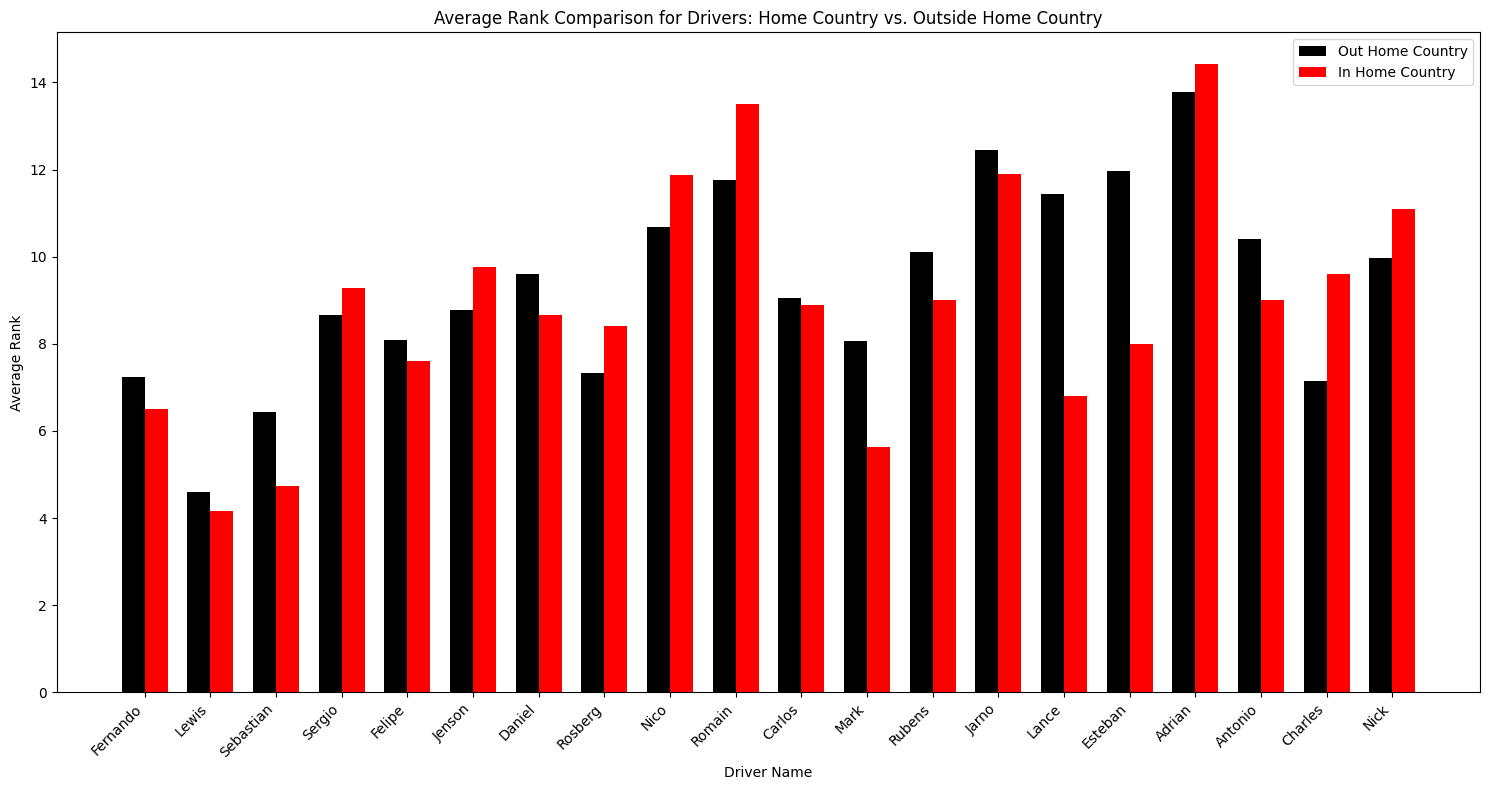

In [2]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Driver names
driverName = ['Fernando', 'Lewis', 'Sebastian', 'Sergio', 'Felipe', 'Jenson', 'Daniel', 'Rosberg', 'Nico', 'Romain', 'Carlos', 'Mark', 'Rubens', 'Jarno', 'Lance', 'Esteban', 'Adrian', 'Antonio', 'Charles', 'Nick']

# Sample data in DataFrame
data = {
    "driverId": [4, 1, 20, 815, 13, 18, 817, 3, 807, 154, 832, 17, 22, 15, 840, 839, 16, 842, 844, 2],
    "driverName": driverName,
    "nonHomeAvgRank": [7.233974, 4.594684, 6.440141, 8.651452, 8.090129, 8.781250, 9.613333, 7.322917, 10.686486, 11.769663, 9.042169, 8.072727, 10.104478, 12.443548, 11.434109, 11.958333, 13.789474, 10.413793, 7.136364, 9.961538],
    "HomeAvgRank": [6.500000, 4.166667, 4.727273, 9.285714, 7.615385, 9.769231, 8.666667, 8.400000, 11.875000, 13.500000, 8.888889, 5.625000, 9.000000, 11.909091, 6.800000, 8.000000, 14.428571, 9.000000, 9.600000, 11.100000]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(15, 8))

# Creating the bar width
bar_width = 0.35

# Creating index for each driverName
index = np.arange(len(df['driverName']))

# Plotting Average Rank in and out of Home Country
plt.bar(index, df['nonHomeAvgRank'], bar_width, color='black', label='Out Home Country')
plt.bar(index + bar_width, df['HomeAvgRank'], bar_width, color='red', label='In Home Country')

plt.xlabel('Driver Name')
plt.ylabel('Average Rank')
plt.title('Average Rank Comparison for Drivers: Home Country vs. Outside Home Country')
plt.xticks(index + bar_width / 2, df['driverName'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.savefig("Average Rank.jpg")
plt.show()


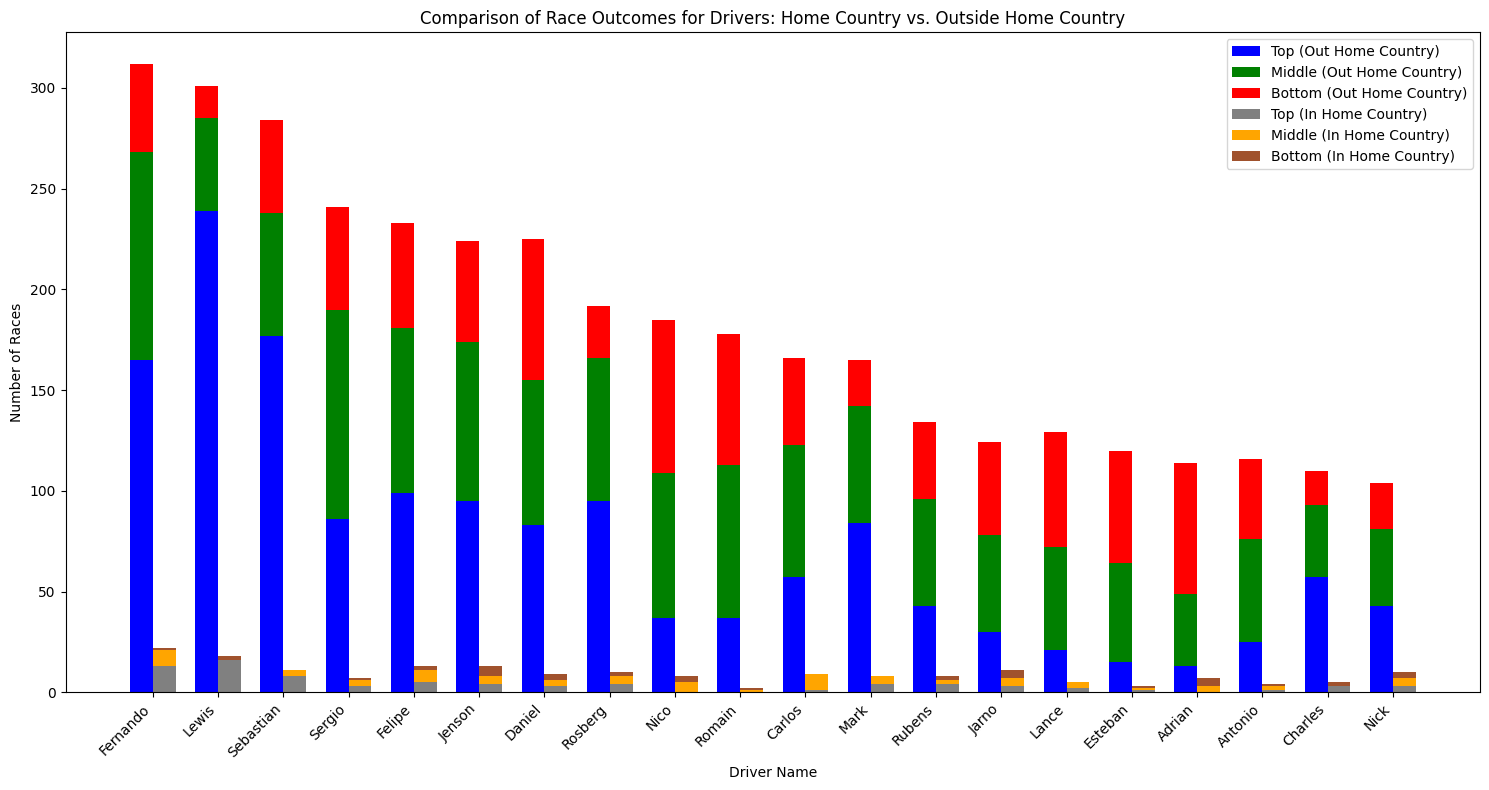

In [155]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

driverName = ['Fernando', 'Lewis', 'Sebastian', 'Sergio', 'Felipe', 'Jenson', 'Daniel', 'Rosberg', 'Nico', 'Romain', 'Carlos', 'Mark', 'Rubens', 'Jarno', 'Lance', 'Esteban', 'Adrian', 'Antonio', 'Charles', 'Nick']

# Sample data in DataFrame
data = {
    "driverId": [4, 1, 20, 815, 13, 18, 817, 3, 807, 154, 832, 17, 22, 15, 840, 839, 16, 842, 844, 2],
    "driverName": driverName,
    "Top (Out Home Country)": [165, 239, 177, 86, 99, 95, 83, 95, 37, 37, 57, 84, 43, 30, 21, 15, 13, 25, 57, 43],
    "Top (In Home Country)": [13, 16, 8, 3, 5, 4, 3, 4, 0, 0, 1, 4, 4, 3, 2, 1, 0, 1, 3, 3],
    "Middle (Out Home Country)": [103, 46, 61, 104, 82, 79, 72, 71, 72, 76, 66, 58, 53, 48, 51, 49, 36, 51, 36, 38],
    "Middle (In Home Country)": [8, 0, 3, 3, 6, 4, 3, 4, 5, 1, 8, 4, 2, 4, 3, 1, 3, 2, 0, 4],
    "Bottom (Out Home Country)": [44, 16, 46, 51, 52, 50, 70, 26, 76, 65, 43, 23, 38, 46, 57, 56, 65, 40, 17, 23],
    "Bottom (In Home Country)": [1, 2, 0, 1, 2, 5, 3, 2, 3, 1, 0, 0, 2, 4, 0, 1, 4, 1, 2, 3]
}

df = pd.DataFrame(data)

# Preparing the data for plotting
# Number of categories
n_categories = 3

# Plotting
plt.figure(figsize=(15, 8))

# Creating the bar width
bar_width = 0.35

# Creating index for each driverId
index = np.arange(len(df['driverId']))

# Plotting Out Home Country data
plt.bar(index, df['Top (Out Home Country)'], bar_width, color='b', label='Top (Out Home Country)')
plt.bar(index, df['Middle (Out Home Country)'], bar_width, color='g', label='Middle (Out Home Country)', bottom=df['Top (Out Home Country)'])
plt.bar(index, df['Bottom (Out Home Country)'], bar_width, color='r', label='Bottom (Out Home Country)', bottom=df['Top (Out Home Country)'] + df['Middle (Out Home Country)'])

# Plotting In Home Country data
plt.bar(index + bar_width, df['Top (In Home Country)'], bar_width, color='grey', label='Top (In Home Country)')
plt.bar(index + bar_width, df['Middle (In Home Country)'], bar_width, color='orange', label='Middle (In Home Country)', bottom=df['Top (In Home Country)'])
plt.bar(index + bar_width, df['Bottom (In Home Country)'], bar_width, color='sienna', label='Bottom (In Home Country)', bottom=df['Top (In Home Country)'] + df['Middle (In Home Country)'])

plt.xlabel('Driver Name')
plt.ylabel('Number of Races')
plt.title('Comparison of Race Outcomes for Drivers: Home Country vs. Outside Home Country')
plt.xticks(index + bar_width / 2, df['driverName'], rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.savefig("Top-Middle-Bottom.jpg")
plt.show()


# other data analysis

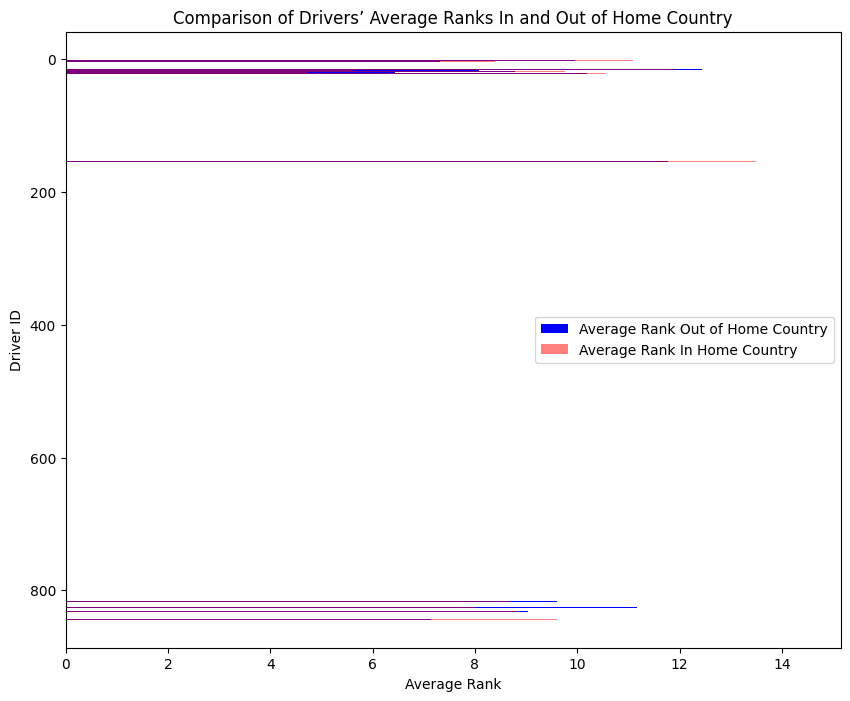

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
data = rr

# Convert to DataFrame for easier handling
df = pd.DataFrame(data, columns=['DriverID', 'AvgRankOutOfHome', 'AvgRankInHome'])

# Sort by DriverID for consistent visualization
df = df.sort_values(by='DriverID')

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(df['DriverID'], df['AvgRankOutOfHome'], color='blue', label='Average Rank Out of Home Country')
plt.barh(df['DriverID'], df['AvgRankInHome'], color='red', alpha=0.5, label='Average Rank In Home Country')
plt.xlabel('Average Rank')
plt.ylabel('Driver ID')
plt.title('Comparison of Drivers’ Average Ranks In and Out of Home Country')
plt.legend()
plt.gca().invert_yaxis()  # Optional: to have the highest DriverID at the top
plt.show()


In [40]:
newres[3]

,country,raceId,driverId,nationality,rank,wins,HomeRace
0,Australia,1,10,German,6,0,False
1,Australia,338,10,German,15,0,False
2,Australia,841,10,German,22,0,False
3,Australia,860,10,German,19,0,False
4,Malaysia,2,10,German,16,0,False
...,...,...,...,...,...,...,...
86,Korea,856,10,German,18,0,False
87,Korea,875,10,German,19,0,False
88,India,857,10,German,23,0,False
89,India,876,10,German,21,0,False


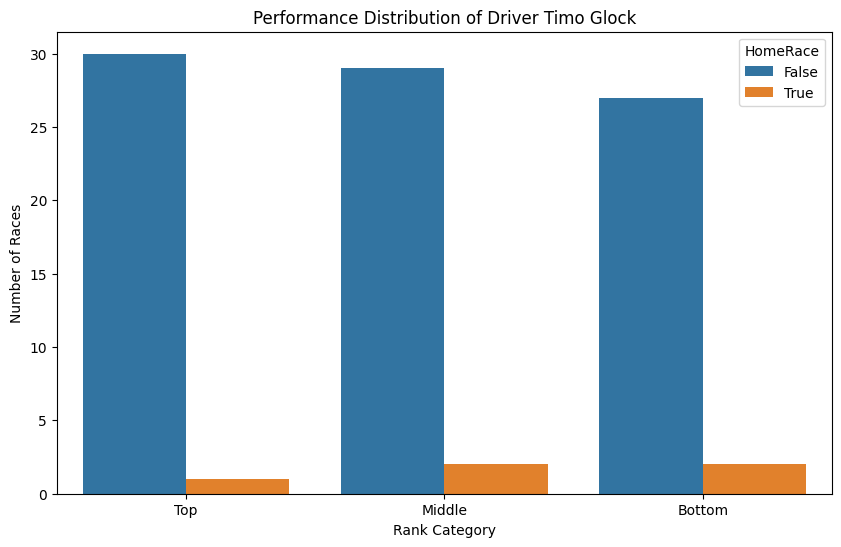

In [41]:
df = pd.DataFrame(newres[3],columns=['driverId','HomeRace','rank'])
# Data visualization

df['rank'] = pd.to_numeric(df['rank'], errors='coerce')

# Drop rows with NaN in 'rank' if any exist after conversion
df.dropna(subset=['rank'], inplace=True)

# Filter for a specific driver
selected_driver_id = 10
driver_data = df[df['driverId'] == selected_driver_id]

# Categorize ranks into 'Top', 'Middle', 'Bottom' based on percentiles
driver_data['RankCategory'] = pd.qcut(driver_data['rank'], 3, labels=['Top', 'Middle', 'Bottom'])

# Data visualization
plt.figure(figsize=(10, 6))
sns.countplot(x='RankCategory', hue='HomeRace', data=driver_data, order=['Top', 'Middle', 'Bottom'])
plt.title(f'Performance Distribution of Driver Timo Glock')
plt.xlabel('Rank Category')
plt.ylabel('Number of Races')
plt.savefig('./archive/Timo Glock.jpg')
plt.show()

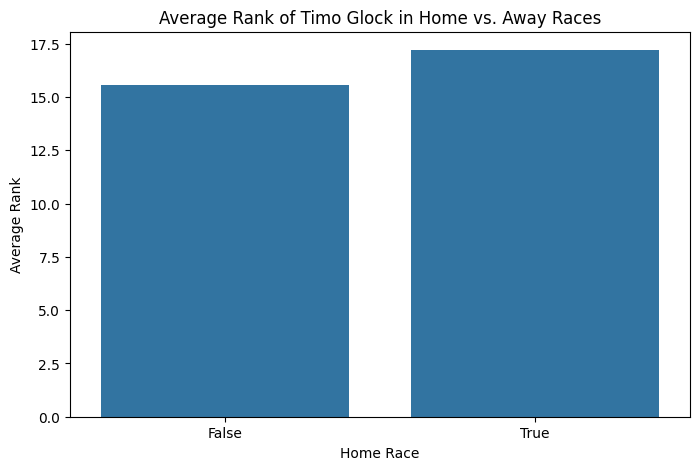

In [316]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_ranks = df.groupby('HomeRace')['rank'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='HomeRace', y='rank', data=mean_ranks)
plt.title('Average Rank of Timo Glock in Home vs. Away Races')
plt.xlabel('Home Race')
plt.ylabel('Average Rank')
plt.savefig("./archive/Timo Glock Average Rank.jpg")
plt.show()


In [320]:
dataset0 = pd.read_csv("./archive/circuits.csv")

In [321]:
dataset0

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


Basic Statistics:
       circuitId        lat         lng
count  77.000000  77.000000   77.000000
mean   39.883117  33.442925    1.076683
std    23.001701  22.808866   65.516951
min     1.000000 -37.849700 -118.189000
25%    20.000000  32.777400   -9.394170
50%    40.000000  40.951700    3.930830
75%    59.000000  46.958900   19.248600
max    80.000000  57.265300  144.968000

Data Types:
circuitId       int64
circuitRef     object
name           object
location       object
country        object
lat           float64
lng           float64
alt            object
url            object
dtype: object


/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_92035/1608887624.py:13: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


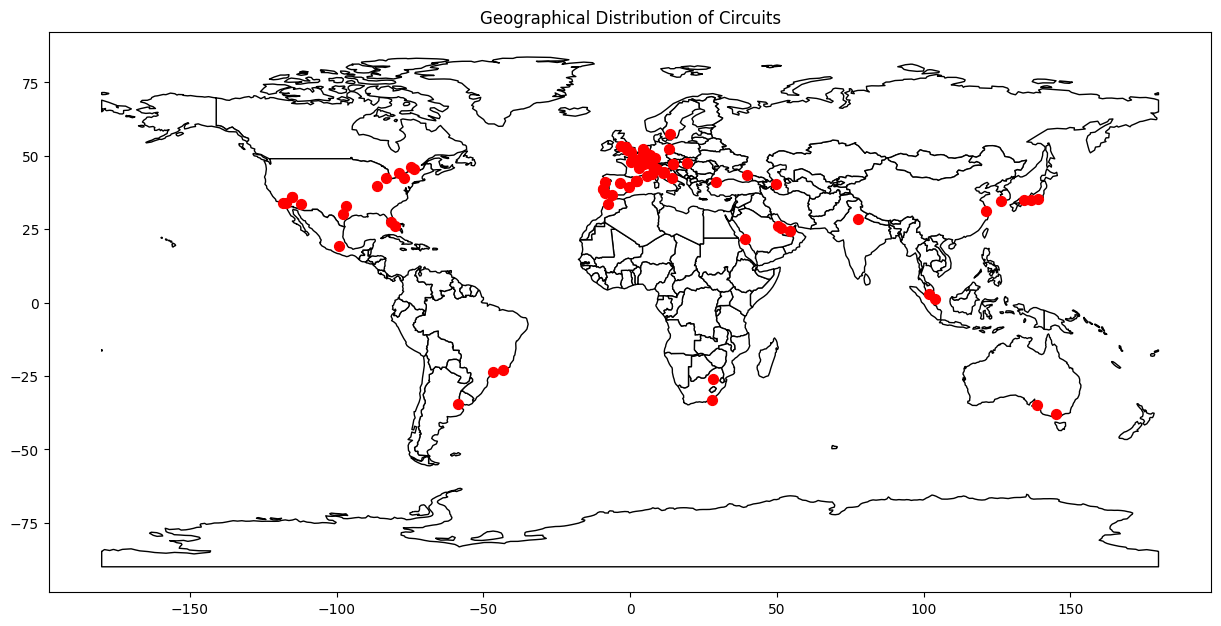

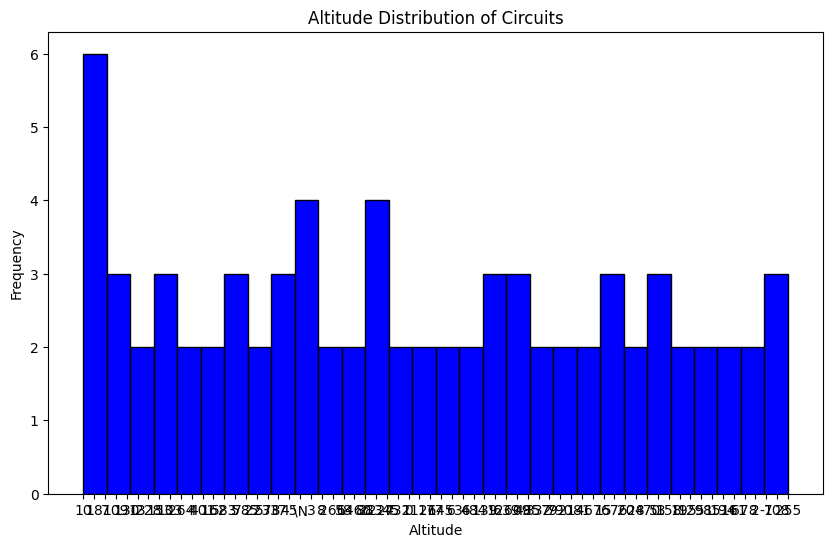

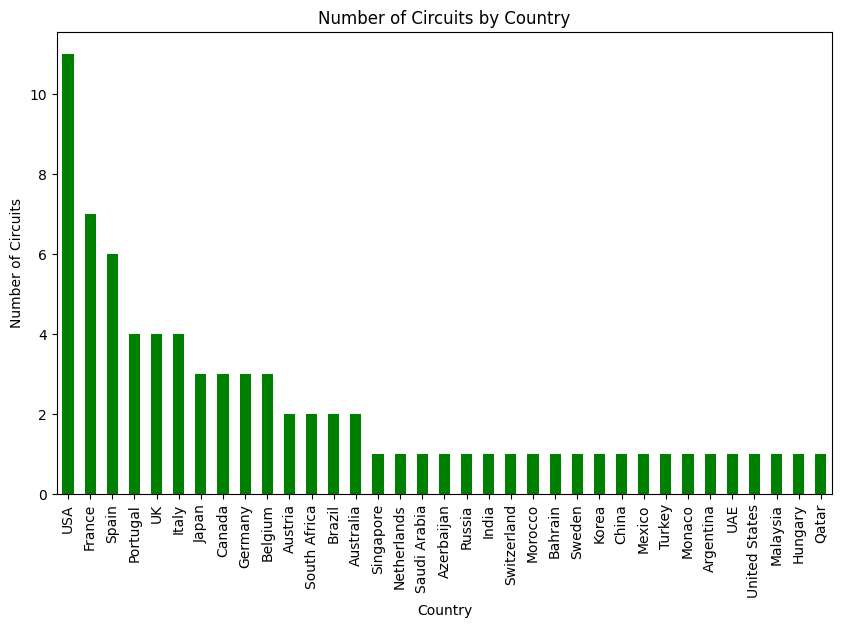

In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
df = dataset0
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Geographical Distribution
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lng, df.lat))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, color='red', markersize=50)
plt.title('Geographical Distribution of Circuits')
plt.savefig("./archive/Geographical Distribution of Circuits.jpg")
plt.show()

# Altitude Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['alt'], bins=30, color='blue', edgecolor='black')
plt.title('Altitude Distribution of Circuits')
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.show()

# Circuits by Country
plt.figure(figsize=(10, 6))
df['country'].value_counts().plot(kind='bar', color='green')
plt.title('Number of Circuits by Country')
plt.xlabel('Country')
plt.ylabel('Number of Circuits')
plt.savefig("./archive/Number of Circuits by Country.jpg")
plt.show()


In [326]:
dataset1 = pd.read_csv("./archive/constructor_results.csv")
dataset1

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N
...,...,...,...,...,...
12285,16785,1110,214,10.0,\N
12286,16786,1110,213,1.0,\N
12287,16787,1110,51,0.0,\N
12288,16788,1110,3,0.0,\N


Basic Statistics:
       constructorResultsId        raceId  constructorId        points
count          12290.000000  12290.000000   12290.000000  12290.000000
mean            8191.007242    511.762815      44.661676      3.859967
std             5561.388146    302.677952      57.851043      7.555135
min                1.000000      1.000000       1.000000      0.000000
25%             3073.250000    281.000000       6.000000      0.000000
50%             6145.500000    477.000000      22.000000      0.000000
75%            13698.750000    722.000000      53.000000      4.000000
max            16789.000000   1110.000000     214.000000     66.000000

Data Types:
constructorResultsId      int64
raceId                    int64
constructorId             int64
points                  float64
status                   object
dtype: object


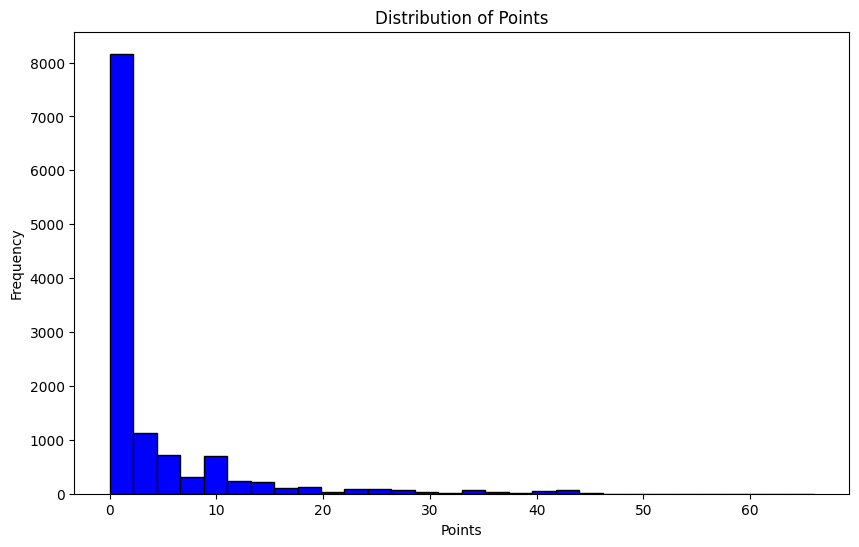

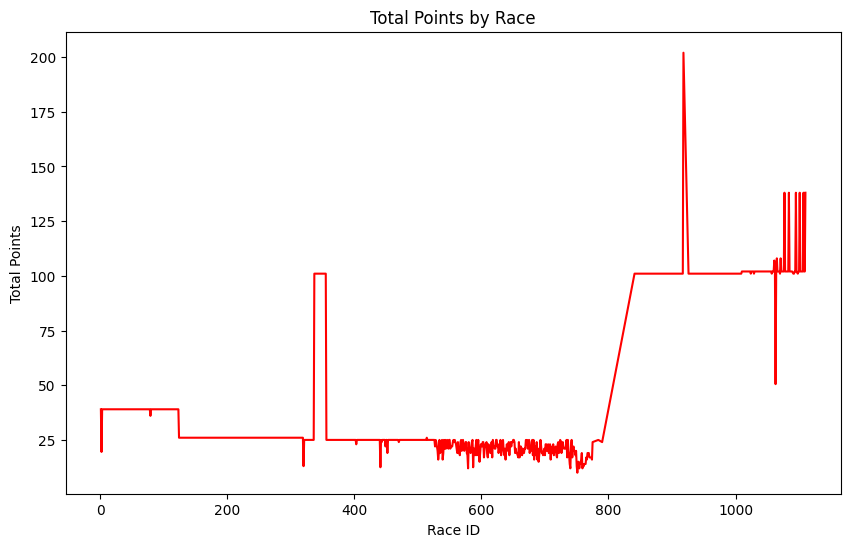

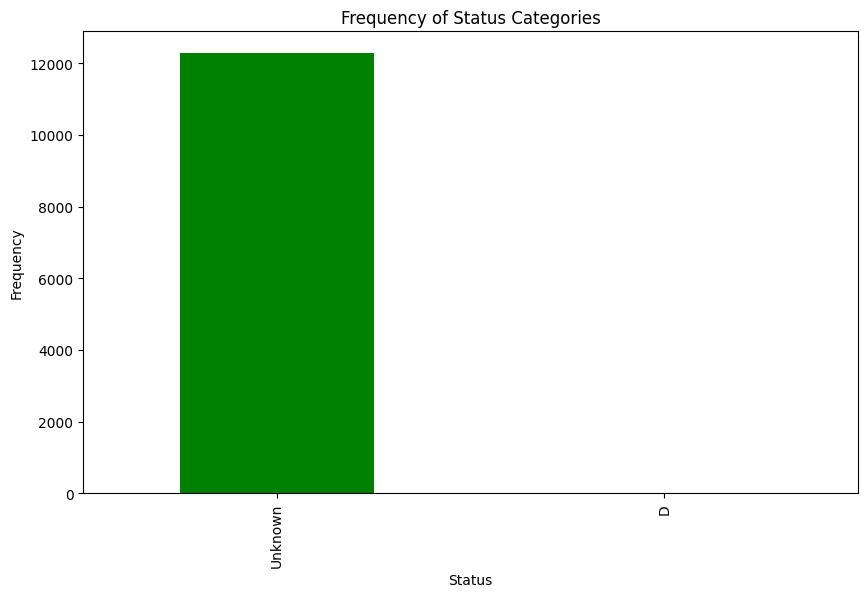

In [329]:
df = dataset1

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Points Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Points.jpg")
plt.show()

# Points by Race
plt.figure(figsize=(10, 6))
df.groupby('raceId')['points'].sum().plot(kind='line', color='red')
plt.title('Total Points by Race')
plt.xlabel('Race ID')
plt.ylabel('Total Points')
plt.savefig("./archive/Total Points.jpg")
plt.show()

# Status Analysis (If applicable)
# If the 'status' column contains categorical data, replace '\N' with a meaningful placeholder
df['status'].replace('\\N', 'Unknown', inplace=True)
status_counts = df['status'].value_counts()
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color='green')
plt.title('Frequency of Status Categories')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()


In [327]:
dataset2 = pd.read_csv("./archive/constructor_standings.csv")
dataset2

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


Basic Statistics:
       constructorStandingsId        raceId  constructorId        points  \
count            13051.000000  13051.000000   13051.000000  13051.000000   
mean             16674.407785    519.974638      48.470232     34.139108   
std               8773.183393    296.269063      59.857491     77.227726   
min                  1.000000      1.000000       1.000000      0.000000   
25%               8798.500000    296.000000       6.000000      0.000000   
50%              20348.000000    497.000000      25.000000      7.000000   
75%              24674.500000    721.000000      57.000000     31.000000   
max              28572.000000   1110.000000     214.000000    765.000000   

           position          wins  
count  13051.000000  13051.000000  
mean       7.271014      0.679182  
std        4.378793      1.823594  
min        1.000000      0.000000  
25%        4.000000      0.000000  
50%        7.000000      0.000000  
75%       10.000000      0.000000  
max      

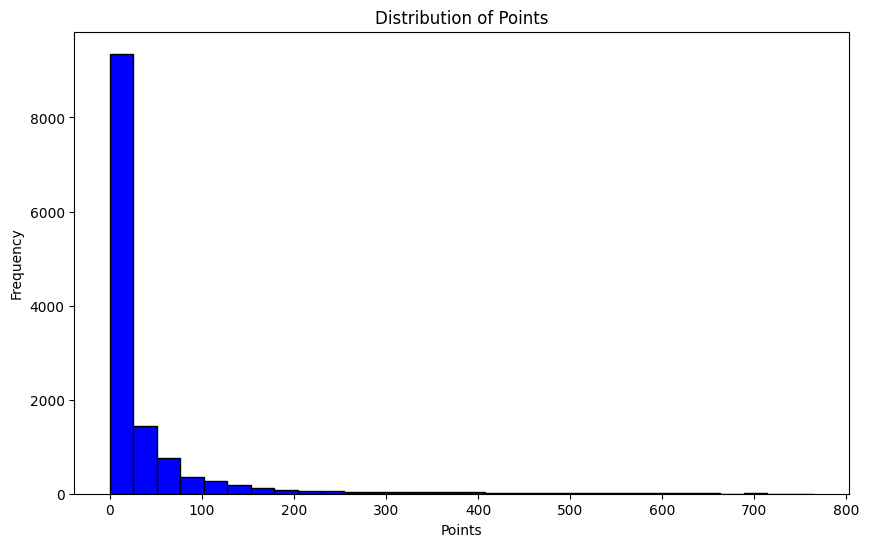

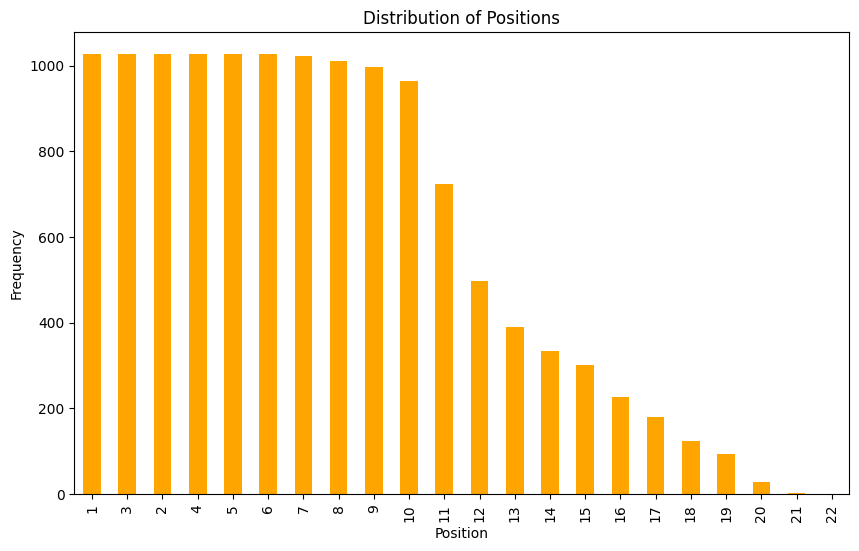

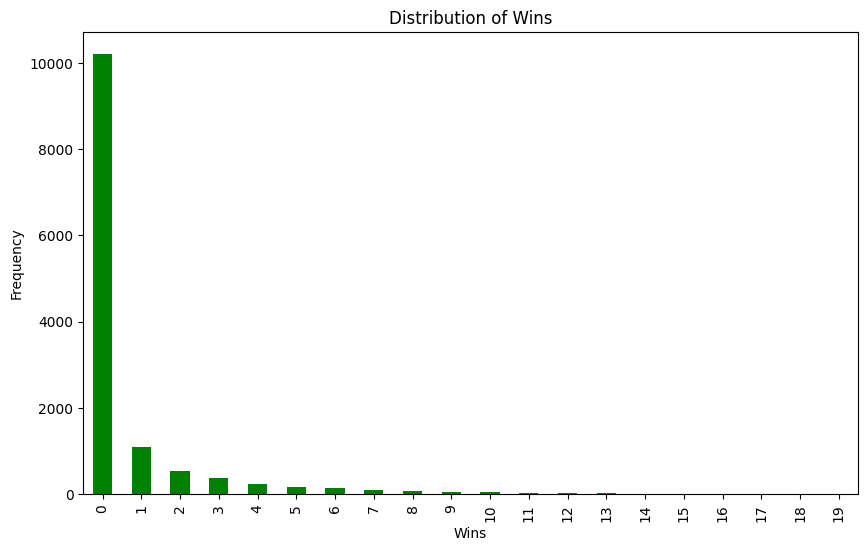

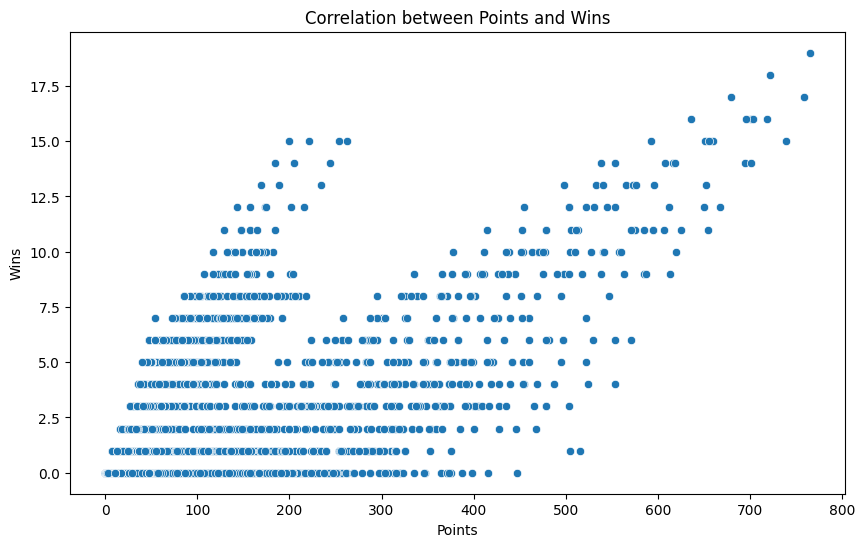

In [335]:
df = dataset2

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Points Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Position Analysis
plt.figure(figsize=(10, 6))
df['position'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Positions.jpg")
plt.show()

# Wins Analysis
plt.figure(figsize=(10, 6))
df['wins'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Wins.jpg")
plt.show()

# Correlation between Points and Wins
plt.figure(figsize=(10, 6))
sns.scatterplot(x='points', y='wins', data=df)
plt.title('Correlation between Points and Wins')
plt.xlabel('Points')
plt.ylabel('Wins')
plt.savefig("./archive/Correlation between Points and Wins.jpg")
plt.show()


In [330]:
dataset3 = pd.read_csv("./archive/constructors.csv")
dataset3

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


Basic Overview:
        constructorId constructorRef     name nationality  \
count      211.000000            211      211         211   
unique            NaN            211      211          24   
top               NaN        mclaren  McLaren     British   
freq              NaN              1        1          86   
mean       107.037915            NaN      NaN         NaN   
std         61.653629            NaN      NaN         NaN   
min          1.000000            NaN      NaN         NaN   
25%         54.500000            NaN      NaN         NaN   
50%        107.000000            NaN      NaN         NaN   
75%        159.500000            NaN      NaN         NaN   
max        214.000000            NaN      NaN         NaN   

                                                    url  
count                                               211  
unique                                              174  
top     http://en.wikipedia.org/wiki/Cooper_Car_Company  
freq               

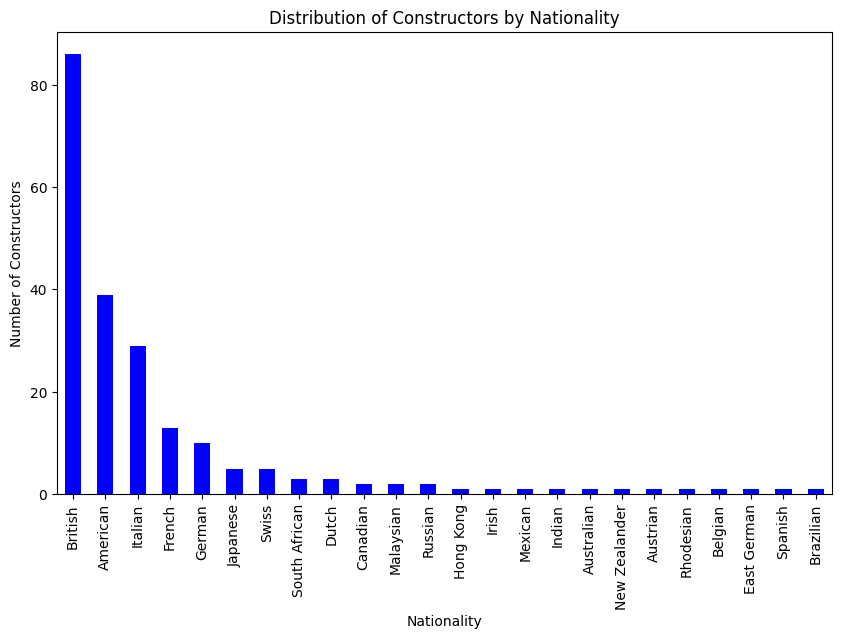

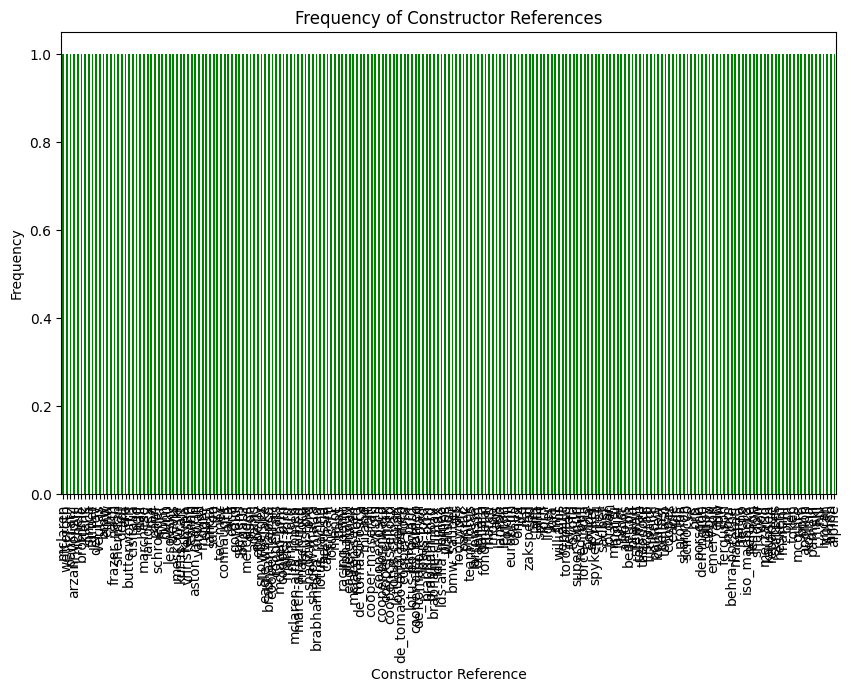

In [339]:
df = dataset3

# Basic Overview
print("Basic Overview:")
print(df.describe(include='all'))  # Include='all' to get statistics for non-numeric columns
print("\nNumber of Unique Constructors:", df['constructorId'].nunique())
print("Number of Unique Nationalities:", df['nationality'].nunique())

# Nationality Distribution
plt.figure(figsize=(10, 6))
df['nationality'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Constructors by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Constructors')
plt.savefig("./archive/Distribution of Constructors by Nationality.jpg")
plt.show()

# Constructor Reference Analysis
plt.figure(figsize=(10, 6))
df['constructorRef'].value_counts().plot(kind='bar', color='green')
plt.title('Frequency of Constructor References')
plt.xlabel('Constructor Reference')
plt.ylabel('Frequency')
plt.show()


In [331]:
dataset4 = pd.read_csv("./archive/driver_standings.csv")
dataset4

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


Basic Statistics:
       driverStandingsId        raceId      driverId        points  \
count       34124.000000  34124.000000  34124.000000  34124.000000   
mean        42535.650656    572.649396    307.284697     13.489987   
std         21729.601277    284.154765    267.228677     35.599709   
min             1.000000      1.000000      1.000000      0.000000   
25%         19649.750000    347.000000     85.000000      0.000000   
50%         49674.500000    595.000000    221.000000      1.000000   
75%         58946.250000    797.000000    509.000000     10.000000   
max         72187.000000   1110.000000    858.000000    454.000000   

           position          wins  
count  34124.000000  34124.000000  
mean      19.897169      0.269429  
std       16.396017      0.995681  
min        1.000000      0.000000  
25%        8.000000      0.000000  
50%       16.000000      0.000000  
75%       26.000000      0.000000  
max      108.000000     15.000000  

Data Types:
driverStanding

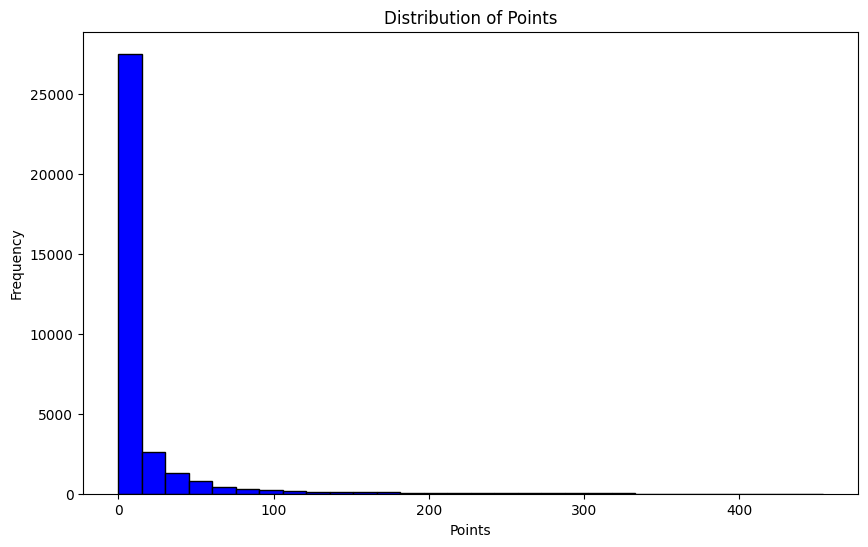

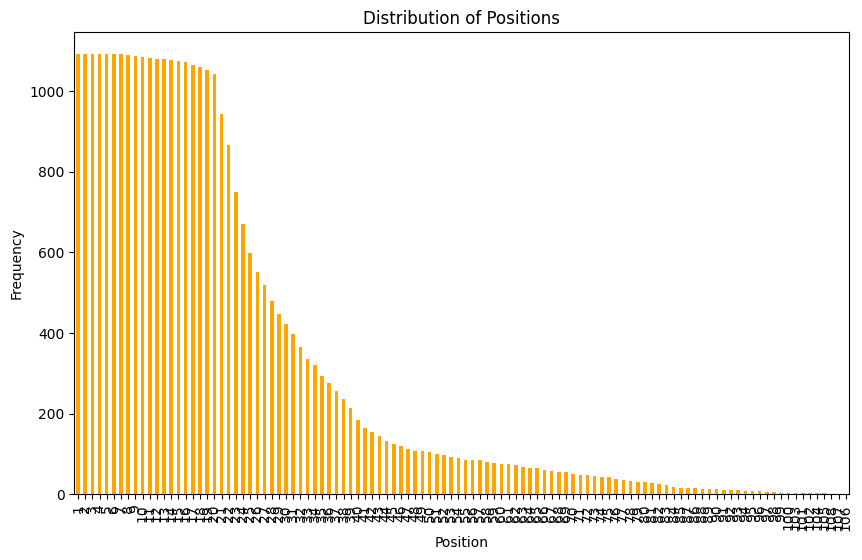

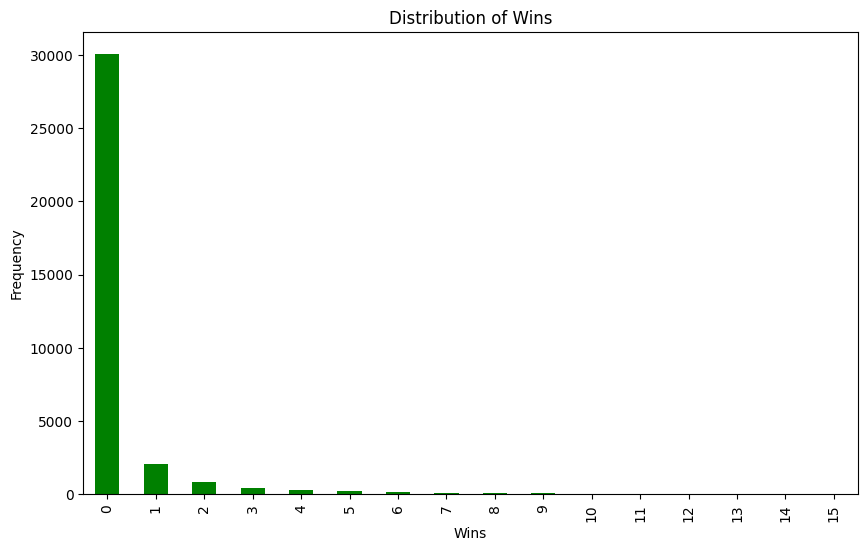

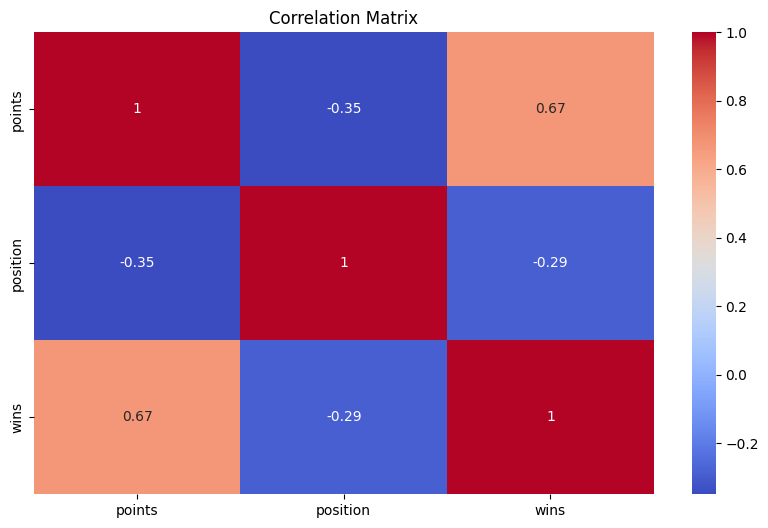

In [337]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset4

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Points Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['points'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Position Analysis
plt.figure(figsize=(10, 6))
df['position'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.show()

# Wins Analysis
plt.figure(figsize=(10, 6))
df['wins'].value_counts().plot(kind='bar', color='green')
plt.title('Distribution of Wins')
plt.xlabel('Wins')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Wins.jpg")
plt.show()

# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df[['points', 'position', 'wins']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig("./archive/Correlation Matrix(points, position, wins).jpg")
plt.show()


In [332]:
dataset5 = pd.read_csv("./archive/drivers.csv")
dataset5

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


Basic Overview:
          driverId driverRef number code forename surname  \
count   857.000000       857    857  857      857     857   
unique         NaN       857     45   95      476     798   
top            NaN  hamilton     \N   \N     John  Taylor   
freq           NaN         1    803  757       14       5   
mean    429.057176       NaN    NaN  NaN      NaN     NaN   
min       1.000000       NaN    NaN  NaN      NaN     NaN   
25%     215.000000       NaN    NaN  NaN      NaN     NaN   
50%     429.000000       NaN    NaN  NaN      NaN     NaN   
75%     643.000000       NaN    NaN  NaN      NaN     NaN   
max     858.000000       NaN    NaN  NaN      NaN     NaN   
std     247.632402       NaN    NaN  NaN      NaN     NaN   

                                  dob nationality  \
count                             857         857   
unique                            NaN          42   
top                               NaN     British   
freq                              NaN  

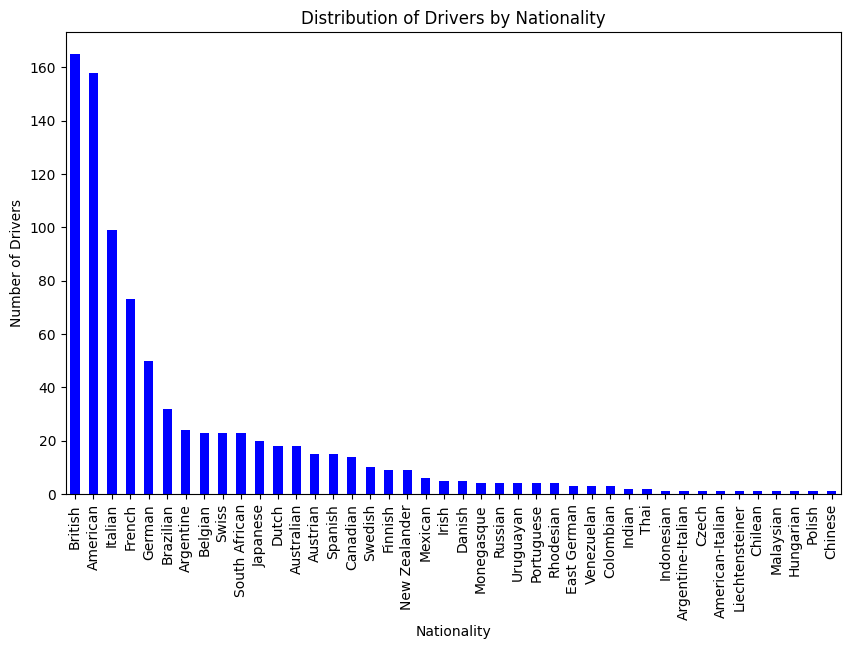

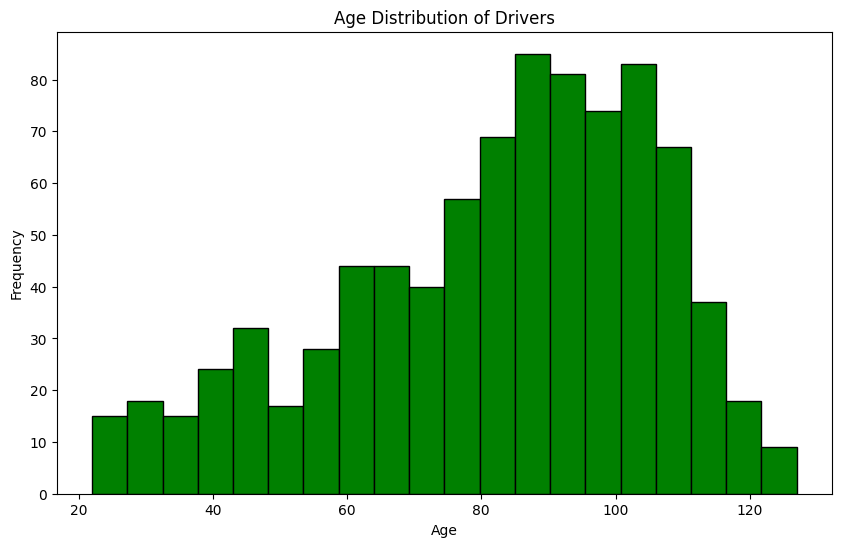

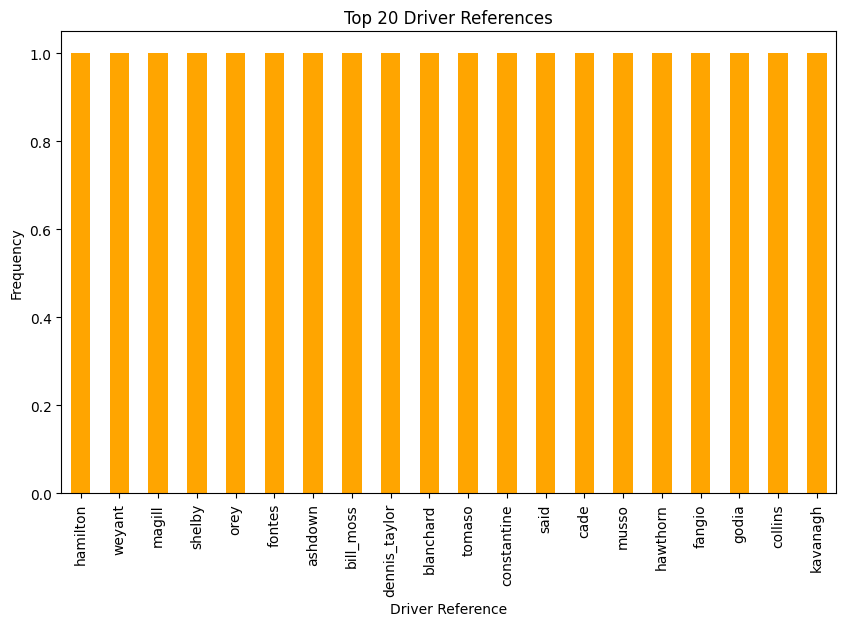

In [348]:

from datetime import datetime

df = dataset5
# Basic Overview
print("Basic Overview:")
print(df.describe(include='all'))  # Include='all' to get statistics for non-numeric columns

# Nationality Distribution
plt.figure(figsize=(10, 6))
df['nationality'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Drivers by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Drivers')
plt.savefig("./archive/Distribution of Drivers by Nationality.jpg")
plt.show()

# Age Distribution
current_year = datetime.now().year
df['dob'] = pd.to_datetime(df['dob'])
df['age'] = current_year - df['dob'].dt.year
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='green', edgecolor='black')
plt.title('Age Distribution of Drivers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("./archive/Age Distribution of Drivers.jpg")
plt.show()

# Driver Reference Analysis
plt.figure(figsize=(10, 6))
df['driverRef'].value_counts().head(20).plot(kind='bar', color='orange')  # Top 20 driver references
plt.title('Top 20 Driver References')
plt.xlabel('Driver Reference')
plt.ylabel('Frequency')
plt.show()


In [333]:
dataset6 = pd.read_csv("./archive/lap_times.csv")
dataset6

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342
...,...,...,...,...,...,...
551737,1110,817,40,17,1:54.361,114361
551738,1110,817,41,17,1:53.367,113367
551739,1110,817,42,16,1:55.247,115247
551740,1110,817,43,16,1:52.115,112115


Basic Statistics:
              raceId       driverId            lap       position  \
count  551742.000000  551742.000000  551742.000000  551742.000000   
mean      564.878467     296.918785      29.990193       9.658699   
std       425.883069     377.935897      18.420399       5.538011   
min         1.000000       1.000000       1.000000       1.000000   
25%       131.000000      15.000000      14.000000       5.000000   
50%       846.000000      39.000000      29.000000       9.000000   
75%       976.000000     817.000000      44.000000      14.000000   
max      1110.000000     858.000000      87.000000      24.000000   

       milliseconds  
count  5.517420e+05  
mean   9.570621e+04  
std    7.478605e+04  
min    5.540400e+04  
25%    8.199300e+04  
50%    9.067300e+04  
75%    1.022430e+05  
max    7.507547e+06  

Data Types:
raceId           int64
driverId         int64
lap              int64
position         int64
time            object
milliseconds     int64
dtype: obje

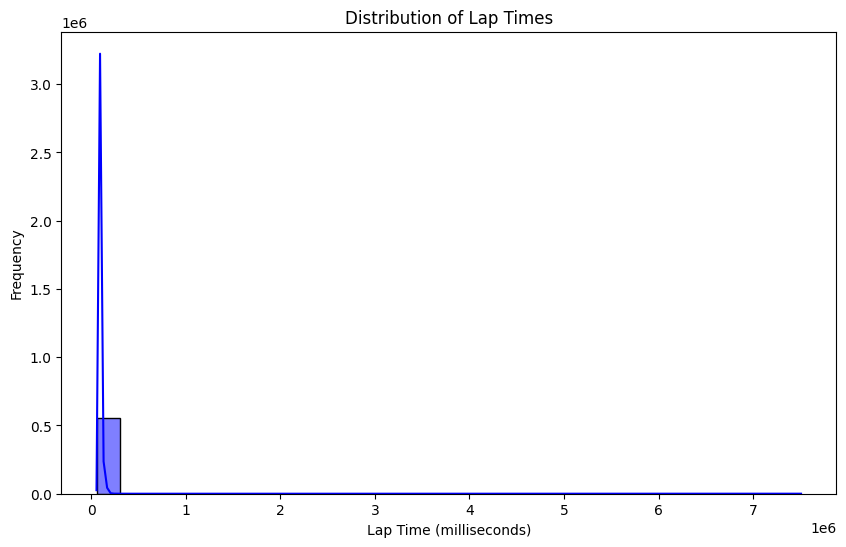

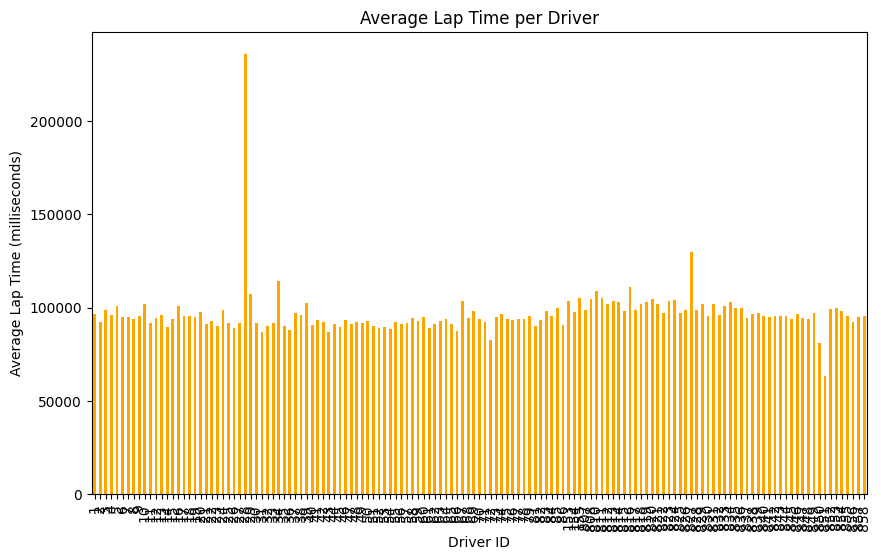

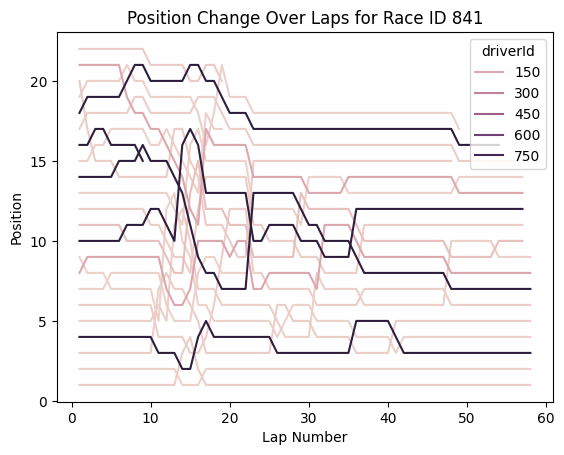

In [353]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset6

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Lap Time Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['milliseconds'], bins=30, kde=True, color='blue')
plt.title('Distribution of Lap Times')
plt.xlabel('Lap Time (milliseconds)')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Lap Times.jpg")
plt.show()

# Average Lap Time per Driver
avg_lap_times = df.groupby('driverId')['milliseconds'].mean()
plt.figure(figsize=(10, 6))
avg_lap_times.plot(kind='bar', color='orange')
plt.title('Average Lap Time per Driver')
plt.xlabel('Driver ID')
plt.ylabel('Average Lap Time (milliseconds)')
plt.show()

# Position Change Analysis (example: for a specific race)
race_example_id = 841  # Replace with a race ID of interest
race_data = df[df['raceId'] == race_example_id]
sns.lineplot(x='lap', y='position', hue='driverId', data=race_data)
plt.title(f'Position Change Over Laps for Race ID {race_example_id}')
plt.xlabel('Lap Number')
plt.ylabel('Position')
plt.savefig("./archive/Position Change Over Laps for Race ID 841.jpg")
plt.show()


In [340]:
dataset7 = pd.read_csv("./archive/pit_stops.csv")
dataset7

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842
...,...,...,...,...,...,...,...
10084,1110,4,2,29,15:59:01,23.798,23798
10085,1110,830,2,30,16:00:16,23.012,23012
10086,1110,848,3,33,16:07:06,23.529,23529
10087,1110,858,3,34,16:09:09,23.109,23109


Basic Statistics:
             raceId      driverId          stop           lap  milliseconds
count  10089.000000  10089.000000  10089.000000  10089.000000  1.008900e+04
mean     962.774011    523.998910      1.759738     25.312023  7.534863e+04
std       81.144375    389.698555      0.916282     14.729775  2.788588e+05
min      841.000000      1.000000      1.000000      1.000000  1.289700e+04
25%      888.000000     18.000000      1.000000     13.000000  2.191400e+04
50%      958.000000    815.000000      2.000000     25.000000  2.357000e+04
75%     1035.000000    831.000000      2.000000     36.000000  2.620200e+04
max     1110.000000    858.000000      6.000000     78.000000  3.069017e+06

Data Types:
raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object


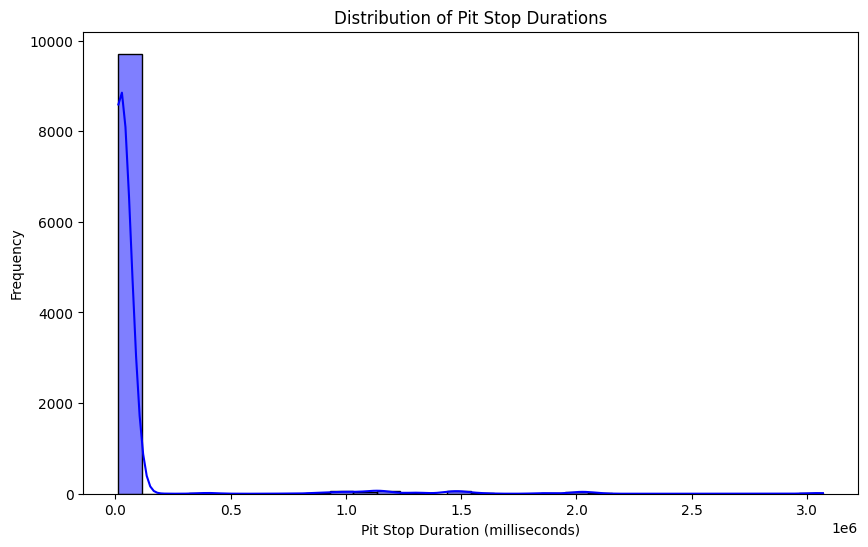

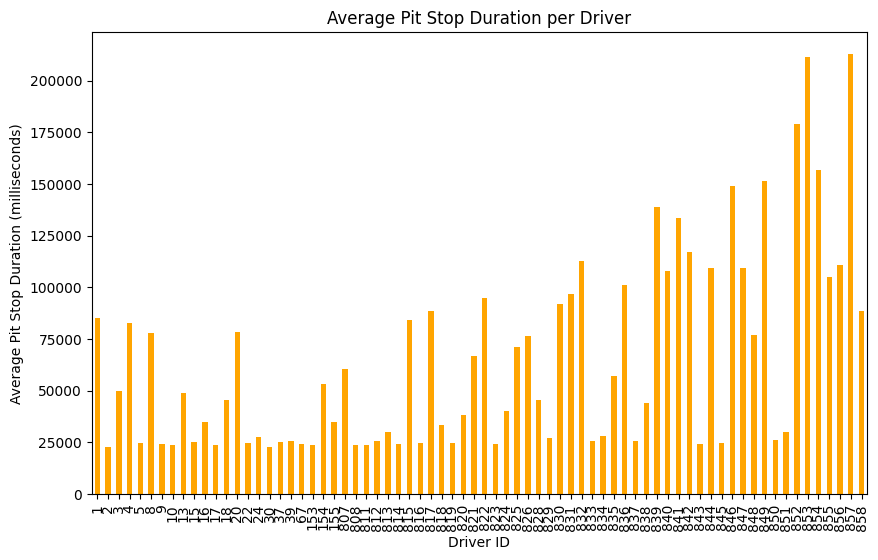

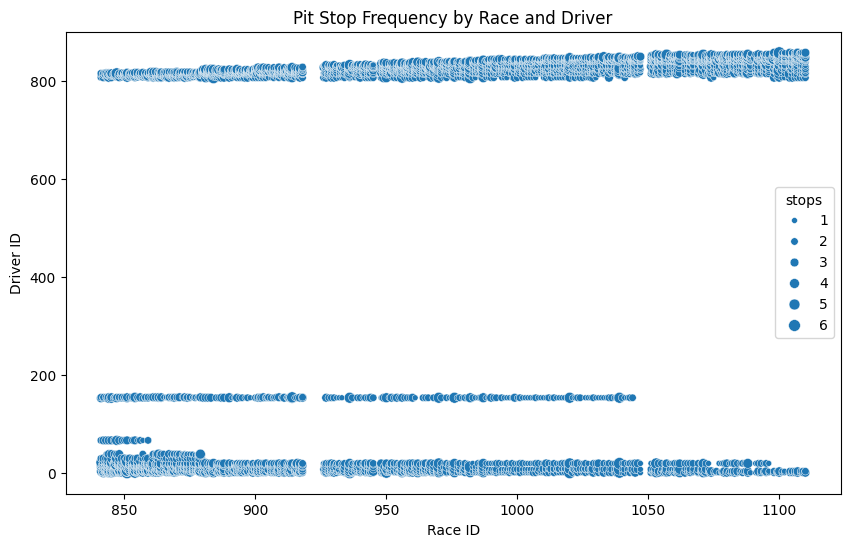

In [355]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset7

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Pit Stop Duration Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['milliseconds'], bins=30, kde=True, color='blue')
plt.title('Distribution of Pit Stop Durations')
plt.xlabel('Pit Stop Duration (milliseconds)')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Pit Stop Durations.jpg")
plt.show()

# Average Pit Stop Duration per Driver
avg_duration_per_driver = df.groupby('driverId')['milliseconds'].mean()
plt.figure(figsize=(10, 6))
avg_duration_per_driver.plot(kind='bar', color='orange')
plt.title('Average Pit Stop Duration per Driver')
plt.xlabel('Driver ID')
plt.ylabel('Average Pit Stop Duration (milliseconds)')
plt.savefig("./archive/Average Pit Stop Duration per Driver.jpg")
plt.show()

# Pit Stop Frequency
pit_stop_count = df.groupby(['raceId', 'driverId']).size().reset_index(name='stops')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='raceId', y='driverId', size='stops', data=pit_stop_count)
plt.title('Pit Stop Frequency by Race and Driver')
plt.xlabel('Race ID')
plt.ylabel('Driver ID')
plt.show()


In [341]:
dataset8 = pd.read_csv("./archive/qualifying.csv")
dataset8

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236
...,...,...,...,...,...,...,...,...,...
9810,9868,1110,848,3,23,16,2:00.314,\N,\N
9811,9869,1110,855,51,24,17,2:00.832,\N,\N
9812,9870,1110,858,3,2,18,2:01.535,\N,\N
9813,9871,1110,817,213,3,19,2:02.159,\N,\N


Basic Statistics:
         qualifyId       raceId     driverId  constructorId       number  \
count  9815.000000  9815.000000  9815.000000    9815.000000  9815.000000   
mean   4920.076108   589.809985   314.514519      44.783597    18.114519   
std    2847.637640   421.207023   381.264736      70.843628    17.859565   
min       1.000000     1.000000     1.000000       1.000000     0.000000   
25%    2455.500000   119.500000    16.000000       4.000000     7.000000   
50%    4910.000000   856.000000    50.000000       9.000000    14.000000   
75%    7383.500000   981.000000   818.000000      28.000000    22.000000   
max    9872.000000  1110.000000   858.000000     214.000000    99.000000   

          position   q1_seconds   q2_seconds   q3_seconds  
count  9815.000000  9666.000000  5342.000000  3297.000000  
mean     11.244931    88.752041    88.086585    87.759943  
std       6.290625    15.661023    12.230646    12.381440  
min       1.000000    53.904000    53.647000    53.377000

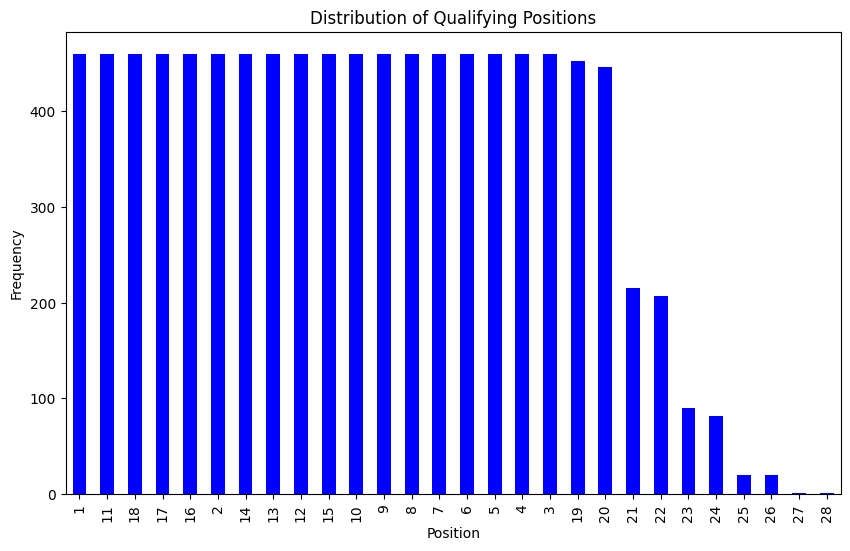

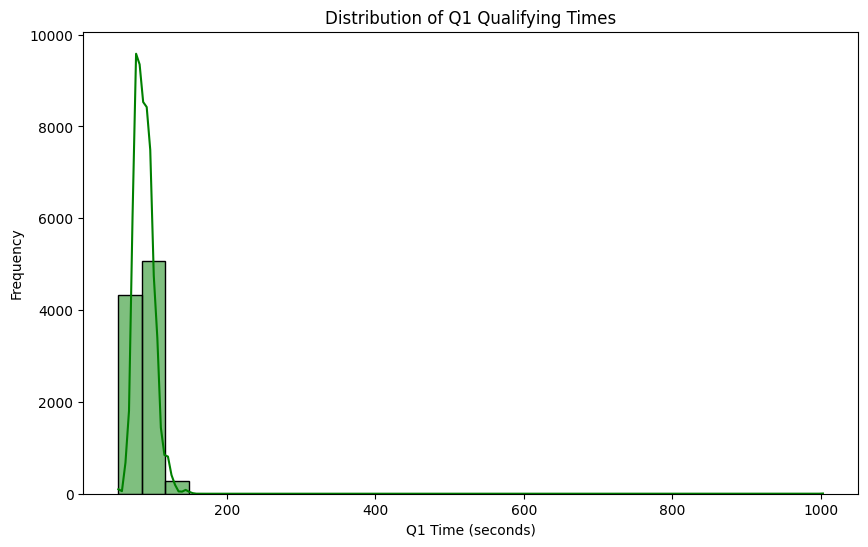

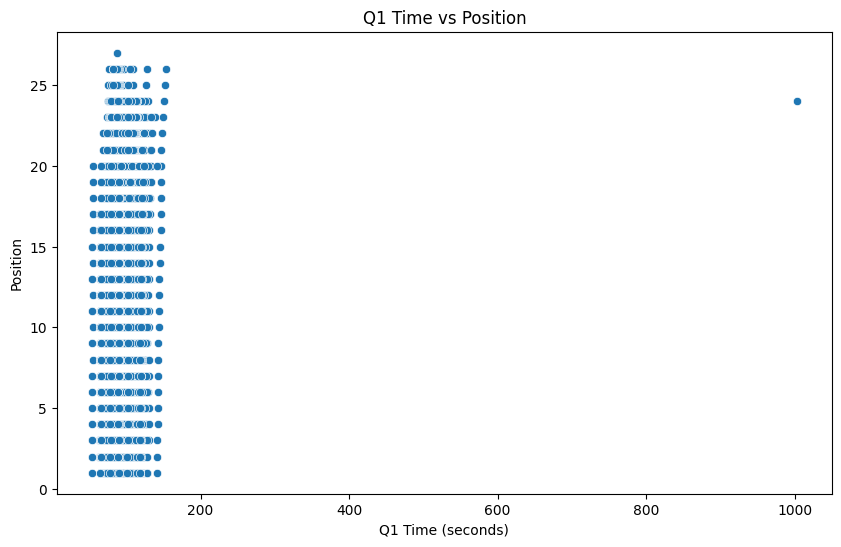

In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert qualifying times to seconds for analysis
def time_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '\\N':
        return None
    elif isinstance(time_str, str):
        time_parts = time_str.split(':')
        minutes = int(time_parts[0])
        seconds = float(time_parts[1])
        return minutes * 60 + seconds
    else:
        return time_str  # If the time is already a numeric value

df = dataset8

# Convert qualifying times from string to seconds
df['q1_seconds'] = df['q1'].apply(time_to_seconds)
df['q2_seconds'] = df['q2'].apply(time_to_seconds)
df['q3_seconds'] = df['q3'].apply(time_to_seconds)

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Position Distribution
plt.figure(figsize=(10, 6))
df['position'].value_counts().plot(kind='bar', color='blue')
plt.title('Distribution of Qualifying Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Qualifying Positions.jpg")
plt.show()

# Qualifying Times Analysis (example with q1)
plt.figure(figsize=(10, 6))
sns.histplot(df['q1_seconds'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Q1 Qualifying Times')
plt.xlabel('Q1 Time (seconds)')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Q1 Qualifying Times.jpg")
plt.show()

# Correlation Analysis (if applicable)
# Example: Correlation between q1 time and position
plt.figure(figsize=(10, 6))
sns.scatterplot(x='q1_seconds', y='position', data=df)
plt.title('Q1 Time vs Position')
plt.xlabel('Q1 Time (seconds)')
plt.ylabel('Position')
plt.savefig("./archive/Q1 Time vs Position.jpg")
plt.show()


In [342]:
dataset9 = pd.read_csv("./archive/races.csv")
dataset9

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1116,2023,18,69,United States Grand Prix,2023-10-22,19:00:00,https://en.wikipedia.org/wiki/2023_United_Stat...,2023-10-20,17:30:00,2023-10-21,18:00:00,\N,\N,2023-10-20,21:00:00,2023-10-21,22:00:00
1097,1117,2023,19,32,Mexico City Grand Prix,2023-10-29,20:00:00,https://en.wikipedia.org/wiki/2023_Mexico_City...,2023-10-27,18:30:00,2023-10-27,22:00:00,2023-10-28,17:30:00,2023-10-28,21:00:00,\N,\N
1098,1118,2023,20,18,São Paulo Grand Prix,2023-11-05,17:00:00,https://en.wikipedia.org/wiki/2023_S%C3%A3o_Pa...,2023-11-03,14:30:00,2023-11-04,14:30:00,\N,\N,2023-11-03,18:00:00,2023-11-04,18:30:00
1099,1119,2023,21,80,Las Vegas Grand Prix,2023-11-19,06:00:00,https://en.wikipedia.org/wiki/2023_Las_Vegas_G...,2023-11-17,04:30:00,2023-11-17,08:00:00,2023-11-18,04:30:00,2023-11-18,08:00:00,\N,\N


Basic Statistics:
            raceId         year        round    circuitId  event_hour
count  1101.000000  1101.000000  1101.000000  1101.000000  370.000000
mean    553.355132  1992.020890     8.494096    23.700272   12.359459
std     321.425790    20.296406     5.081089    19.346014    3.494165
min       1.000000  1950.000000     1.000000     1.000000    3.000000
25%     276.000000  1976.000000     4.000000     9.000000   12.000000
50%     551.000000  1994.000000     8.000000    18.000000   12.000000
75%     826.000000  2010.000000    12.000000    34.000000   14.000000
max    1120.000000  2023.000000    22.000000    80.000000   20.000000

Data Types:
raceId           int64
year             int64
round            int64
circuitId        int64
name            object
date            object
time            object
url             object
fp1_date        object
fp1_time        object
fp2_date        object
fp2_time        object
fp3_date        object
fp3_time        object
quali_date      o

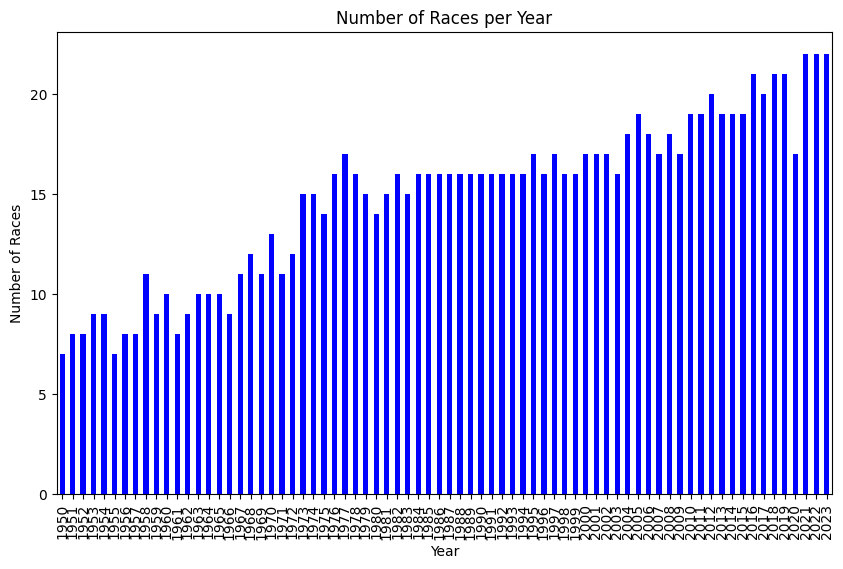

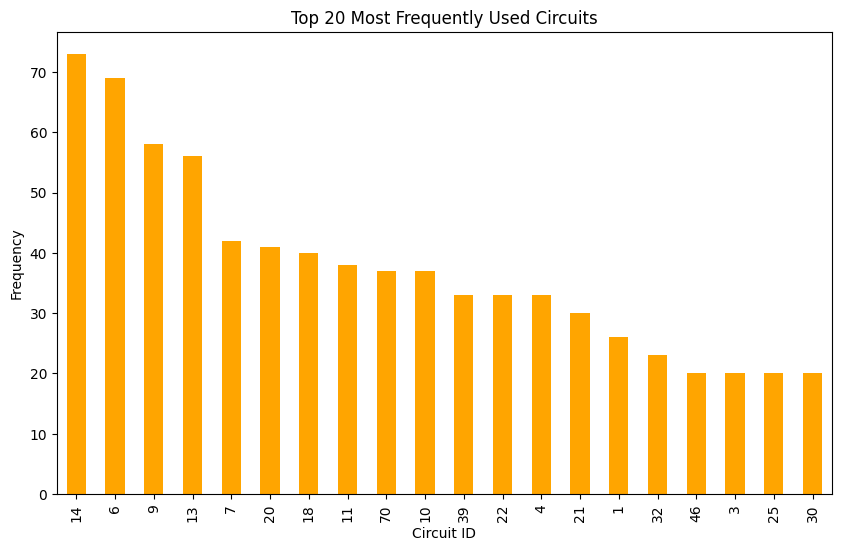

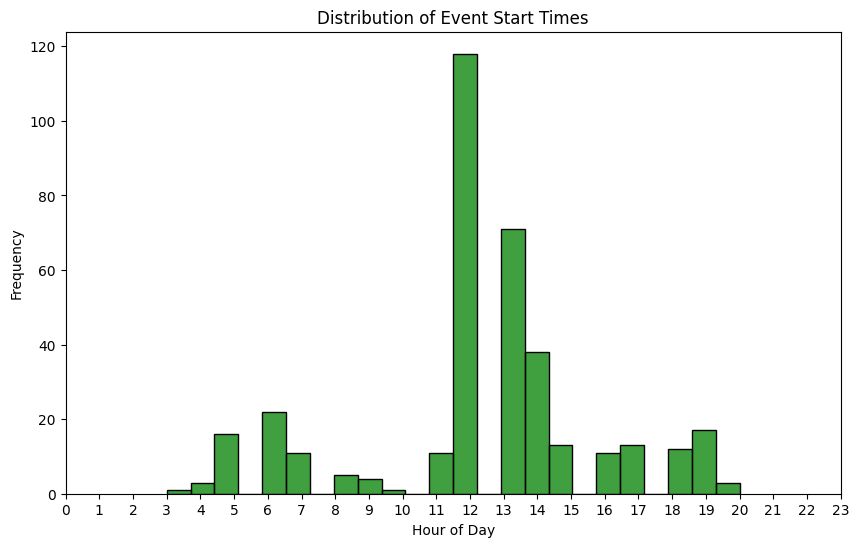

In [357]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset9

# Basic Statistics and Properties
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Races per Year
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar', color='blue')
plt.title('Number of Races per Year')
plt.xlabel('Year')
plt.ylabel('Number of Races')
plt.savefig("./archive/Number of Races per Year.jpg")
plt.show()

# Circuit Frequency
plt.figure(figsize=(10, 6))
df['circuitId'].value_counts().head(20).plot(kind='bar', color='orange')  # Top 20 circuits
plt.title('Top 20 Most Frequently Used Circuits')
plt.xlabel('Circuit ID')
plt.ylabel('Frequency')
plt.savefig("./archive/Number of Races per Year.jpg")
plt.show()

# Event Timing Analysis
# Convert 'time' column to datetime object and extract hour for analysis
df['event_hour'] = pd.to_datetime(df['time'], format='%H:%M:%S', errors='coerce').dt.hour
plt.figure(figsize=(10, 6))
sns.histplot(df['event_hour'].dropna(), bins=24, kde=False, color='green')
plt.title('Distribution of Event Start Times')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xticks(range(0, 24))
plt.savefig("./archive/Distribution of Event Start Times.jpg")
plt.show()


In [343]:
dataset10 = pd.read_csv("./archive/results.csv")
dataset10

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130


Basic Statistics:
            resultId        raceId      driverId  constructorId number  \
count   26080.000000  26080.000000  26080.000000   26080.000000  26080   
unique           NaN           NaN           NaN            NaN    130   
top              NaN           NaN           NaN            NaN      6   
freq             NaN           NaN           NaN            NaN    994   
mean    13041.372661    536.695667    266.277569      49.059663    NaN   
std      7530.008377    303.034639    272.581622      60.221056    NaN   
min         1.000000      1.000000      1.000000       1.000000    NaN   
25%      6520.750000    294.750000     57.000000       6.000000    NaN   
50%     13040.500000    519.000000    163.000000      25.000000    NaN   
75%     19560.250000    791.000000    364.000000      58.250000    NaN   
max     26085.000000   1110.000000    858.000000     214.000000    NaN   

                grid position positionText  positionOrder        points  \
count   26080.0000

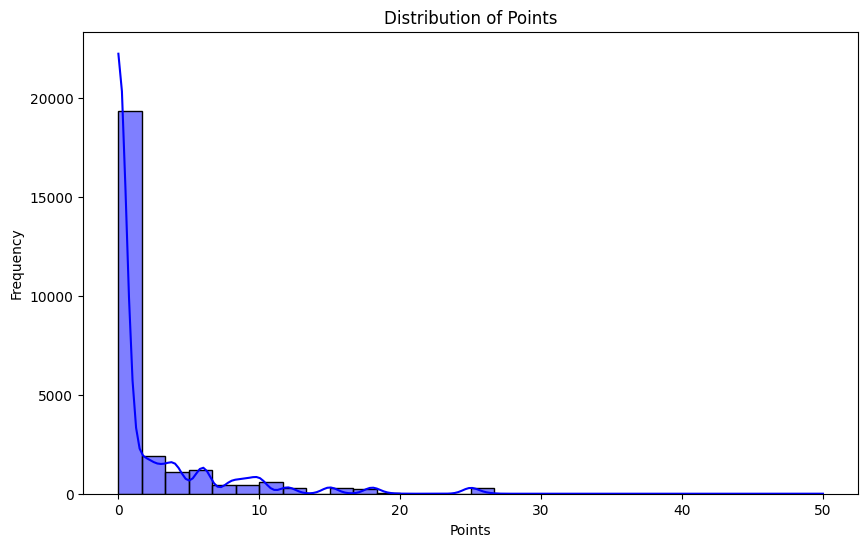

/var/folders/2m/9894cz412q36h1nw7pm2w4km0000gn/T/ipykernel_92035/3962447672.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='positionOrder', data=df, palette='Set2')


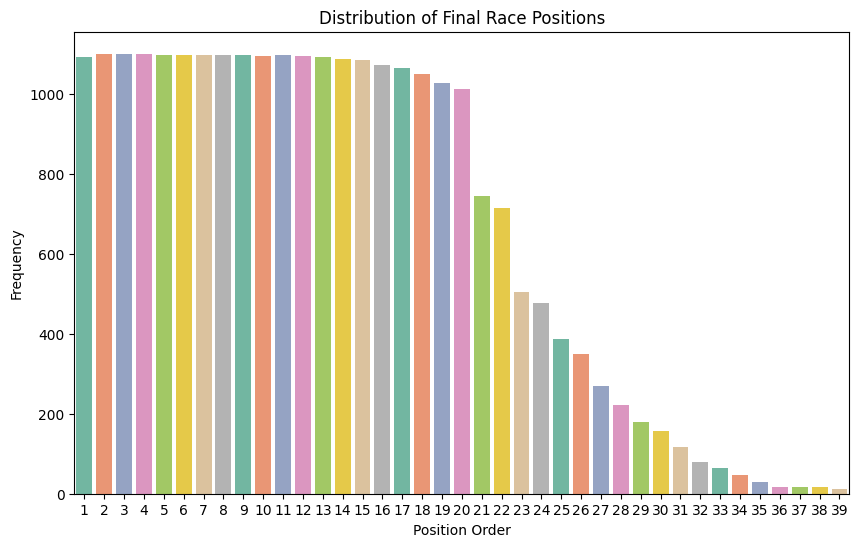

"\nplt.figure(figsize=(10, 6))\nsns.histplot(df['fastestLapSpeed'], bins=30, kde=True, color='green')\nplt.title('Distribution of Fastest Lap Speeds')\nplt.xlabel('Fastest Lap Speed (km/h)')\nplt.ylabel('Frequency')\nplt.show()\n"

In [363]:
df = dataset10

# Basic Statistics
print("Basic Statistics:")
print(df.describe(include='all'))

# Points Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], bins=30, kde=True, color='blue')
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.show()

# Position Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='positionOrder', data=df, palette='Set2')
plt.title('Distribution of Final Race Positions')
plt.xlabel('Position Order')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Final Race Positions.jpg")
plt.show()

# Fastest Lap Analysis
# Convert fastest lap time to a numeric value for analysis (if necessary)
# Example: df['fastestLapTime_seconds'] = ...

'''
plt.figure(figsize=(10, 6))
sns.histplot(df['fastestLapSpeed'], bins=30, kde=True, color='green')
plt.title('Distribution of Fastest Lap Speeds')
plt.xlabel('Fastest Lap Speed (km/h)')
plt.ylabel('Frequency')
plt.show()
'''


In [345]:
dataset11 = pd.read_csv("./archive/sprint_results.csv")
dataset11

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,176,1110,858,3,2,13,16,16,16,0,11,+37.571,1536004,6,2:03.482,1
176,177,1110,807,210,27,20,17,17,17,0,11,+37.827,1536260,6,2:03.472,1
177,178,1110,852,213,22,16,18,18,18,0,11,+39.267,1537700,7,2:02.080,1
178,179,1110,815,9,11,8,\N,R,19,0,8,\N,\N,2,2:02.516,130


Basic Statistics:
         resultId       raceId    driverId  constructorId      number  \
count  180.000000   180.000000  180.000000     180.000000  180.000000   
mean    90.500000  1085.666667  714.088889      95.500000   27.550000   
std     52.105662    17.362388  298.112841      88.359632   24.273874   
min      1.000000  1061.000000    1.000000       1.000000    1.000000   
25%     45.750000  1071.000000  817.000000       6.000000   10.000000   
50%     90.500000  1084.000000  840.000000      84.000000   20.000000   
75%    135.250000  1101.000000  847.000000     210.000000   44.000000   
max    180.000000  1110.000000  858.000000     214.000000   99.000000   

             grid  positionOrder      points        laps  fastestLap  \
count  180.000000     180.000000  180.000000  180.000000  174.000000   
mean    10.100000      10.500000    1.300000   19.216667   10.655172   
std      5.861626       5.782366    2.318013    5.469341    5.889792   
min      0.000000       1.000000    

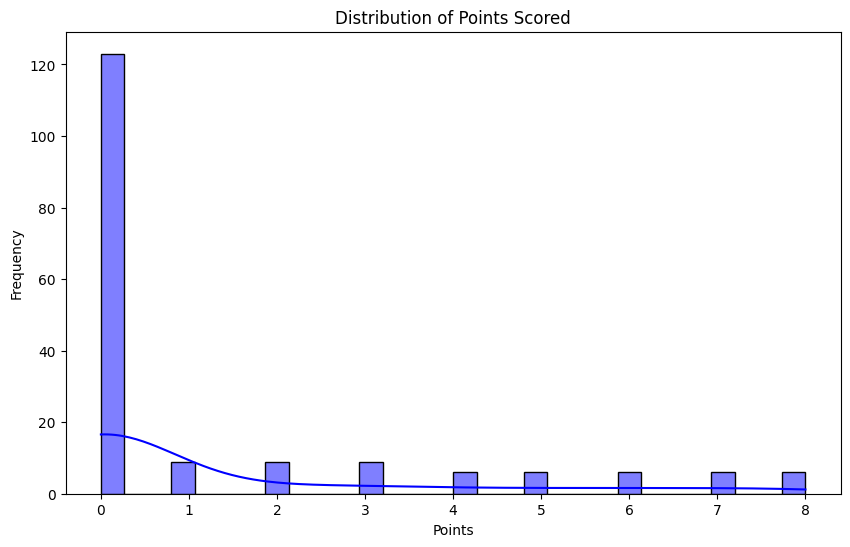

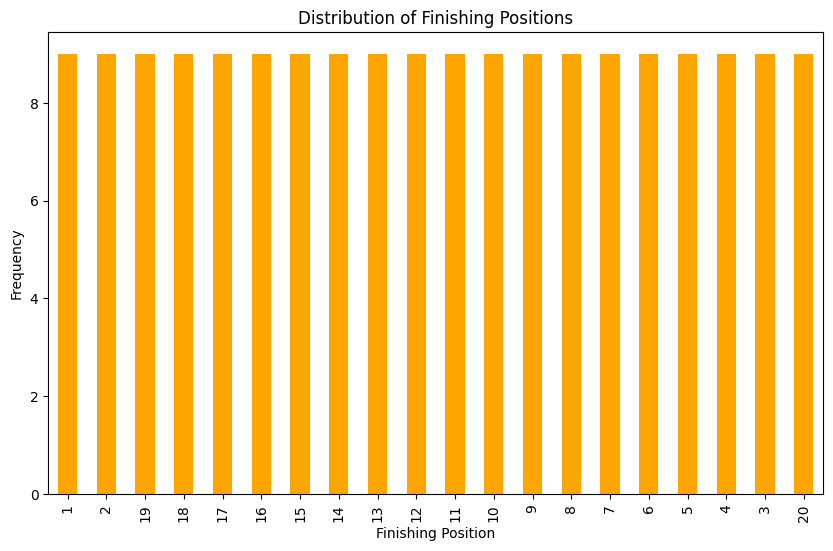

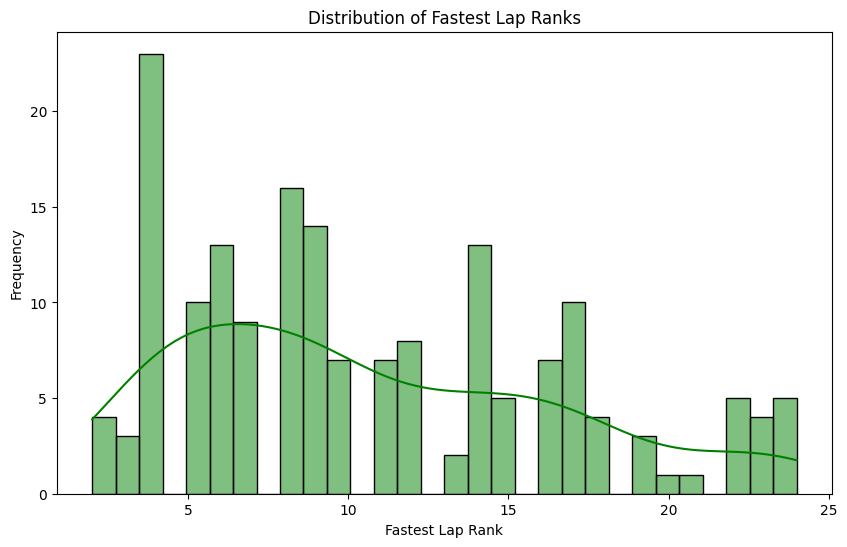

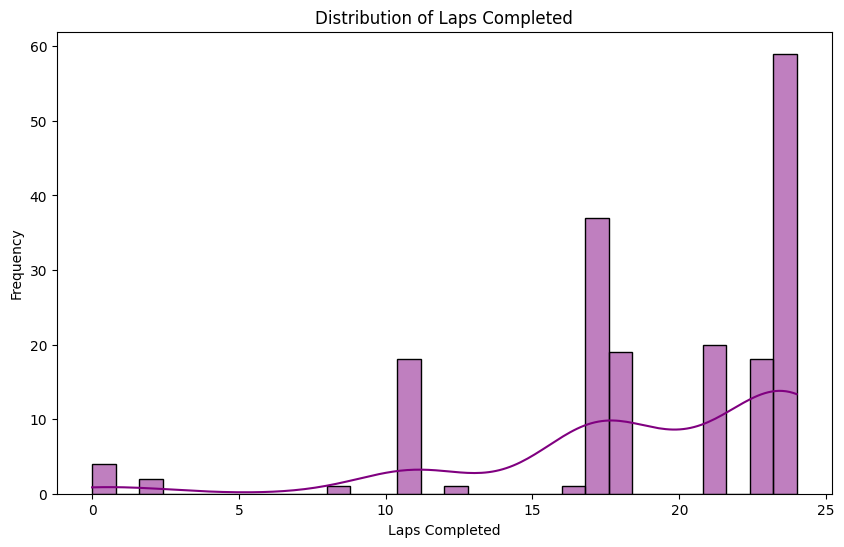

In [361]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = dataset11

# Replace '\\N' with NaN in the 'fastestLap' column
df['fastestLap'].replace('\\N', pd.NA, inplace=True)

# Basic Statistics
print("Basic Statistics:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

# Points Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['points'], bins=30, kde=True, color='blue')
plt.title('Distribution of Points Scored')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Points Scored.jpg")
plt.show()

# Finishing Position Analysis
plt.figure(figsize=(10, 6))
df['positionOrder'].value_counts().plot(kind='bar', color='orange')
plt.title('Distribution of Finishing Positions')
plt.xlabel('Finishing Position')
plt.ylabel('Frequency')
plt.show()

# Fastest Lap Analysis
# Convert 'fastestLap' to integer after handling '\\N'
df['fastestLap'] = pd.to_numeric(df['fastestLap'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.histplot(df['fastestLap'].dropna(), bins=30, kde=True, color='green')
plt.title('Distribution of Fastest Lap Ranks')
plt.xlabel('Fastest Lap Rank')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Fastest Lap Ranks.jpg")
plt.show()

# Laps Completed Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['laps'], bins=30, kde=True, color='purple')
plt.title('Distribution of Laps Completed')
plt.xlabel('Laps Completed')
plt.ylabel('Frequency')
plt.savefig("./archive/Distribution of Laps Completed.jpg")
plt.show()


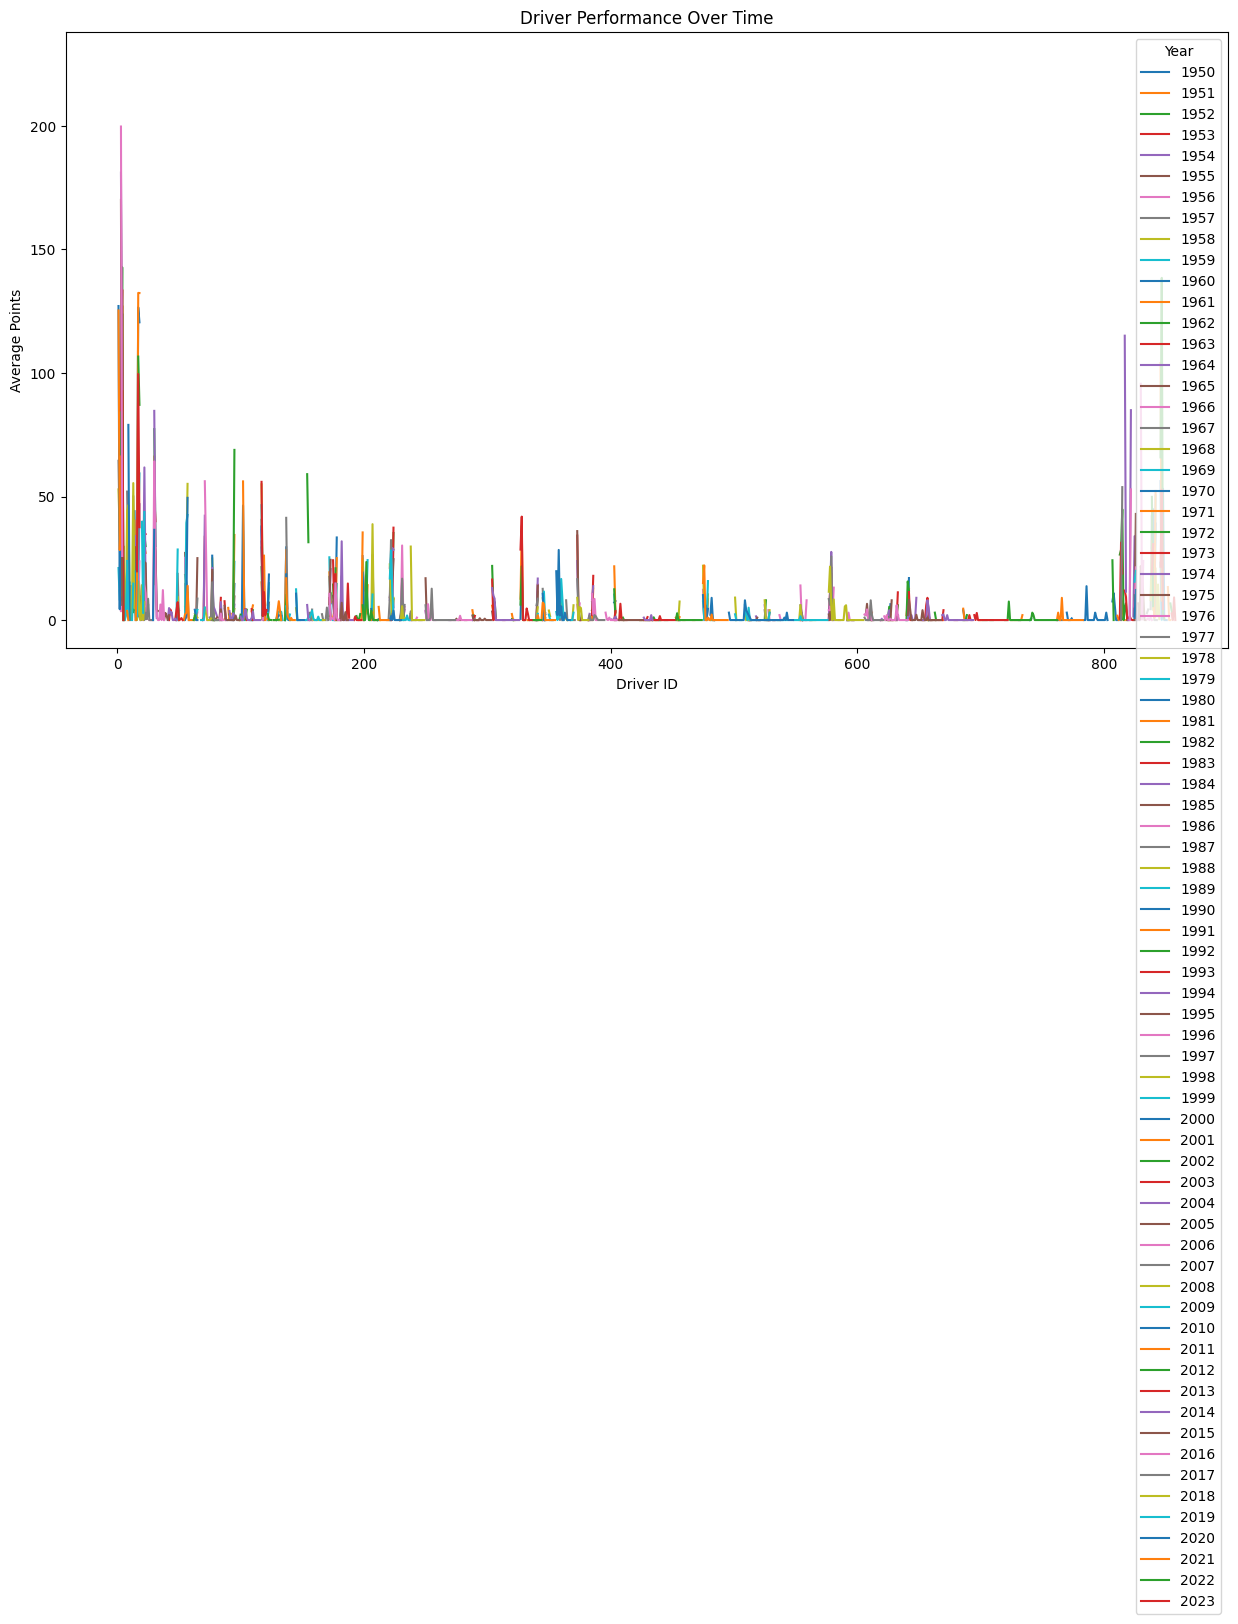

In [367]:


# Merging driver standings with race information
driver_performance_over_time = pd.merge(dataset4, dataset9[['raceId', 'year']], on='raceId')

# Aggregating average points per year for each driver
average_points_by_year = driver_performance_over_time.groupby(['driverId', 'year'])['points'].mean().unstack()

# Plotting
average_points_by_year.plot(figsize=(15, 8))
plt.title('Driver Performance Over Time')
plt.xlabel('Driver ID')
plt.ylabel('Average Points')
plt.legend(title='Year')
plt.savefig("./archive/Driver Performance Over Time.jpg")
plt.show()


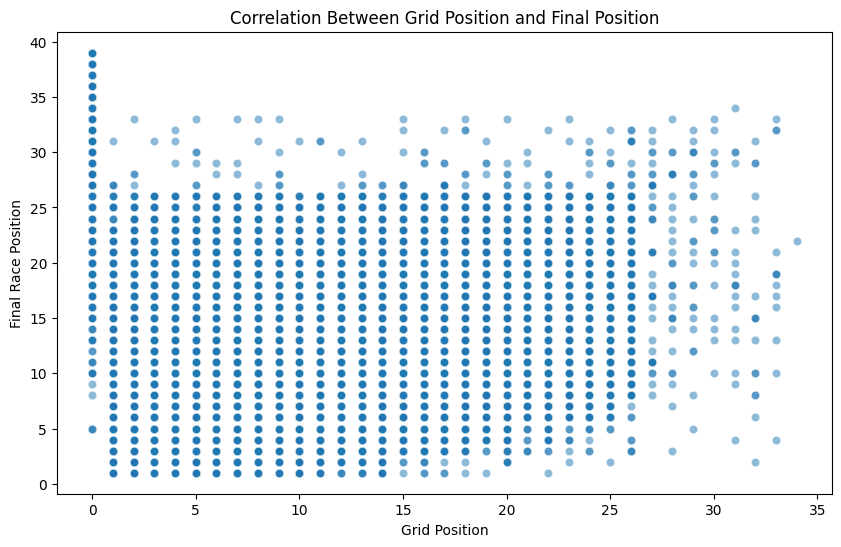

In [369]:
# Assuming dataset10 contains race results
race_results = dataset10

# Convert position and grid to numeric, handling non-numeric entries
race_results['positionOrder'] = pd.to_numeric(race_results['positionOrder'], errors='coerce')
race_results['grid'] = pd.to_numeric(race_results['grid'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=race_results, x='grid', y='positionOrder', alpha=0.5)
plt.title('Correlation Between Grid Position and Final Position')
plt.xlabel('Grid Position')
plt.ylabel('Final Race Position')
plt.savefig("./archive/Correlation Between Grid Position and Final Position.jpg")
plt.show()


In [373]:
dataset10

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,3,19,16,16,16,0.0,44,+1:43.071,5053521,25,15,1:50.994,227.169,1
26076,26082,1110,858,3,2,18,17,17,17,0.0,44,+1:44.476,5054926,37,9,1:50.486,228.213,1
26077,26083,1110,807,210,27,0,18,18,18,0.0,44,+1:50.450,5060900,26,4,1:49.907,229.415,1
26078,26084,1110,832,6,55,4,\N,R,19,0.0,23,\N,\N,9,19,1:53.138,222.864,130
